In [6]:
# Import the Libraries

import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [7]:
# Import the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from scipy.special import inv_boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import scipy as sci
import scipy.stats as stats
from seaborn_qqplot import pplot
import sidetable

sns.set_style('whitegrid')
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlinrBackend.figure_format ='retina'

In [3]:
# request 

page = requests.get('https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=1')

In [3]:
page

<Response [200]>

In [4]:
soup = BeautifulSoup(page.text)

In [5]:
# Extracting all Data from Makaan webside
# this Extracting only first page

seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

# 1. Seller Name
seller_name = soup.find_all('a',class_='seller-name')
for i in seller_name:
    a = i.text
    seller.append(a)
    
# 2. Seller type
seller_type = soup.find_all('div',class_='second-line')
for i in seller_type:
    a = i.text
    sellertype.append(a)
    
# 3. BHK
BHK = soup.find_all('a',class_='typelink')
for i in BHK:
    a = i.text
    BHKs.append(a)
    
# 4. Location
loc = soup.find_all("a",class_="loclink")
for i in loc:
    a = i.text
    location.append(a)
    
# 5. City
city = soup.find_all("span",class_="cityName")
for i in city:
    a = i.text
    City.append(a)

# 6. Total Price
total_price = soup.find_all("td",class_="price")
for i in total_price:
    a = i.text
    Price.append(a)

# 7. price per sqft
price_per_sqft = soup.find_all("td",class_="lbl rate")
for i in price_per_sqft:
    a = i.text
    b = a.replace('/ sq ft','')
    Price_per_sqft.append(b)
    
# 8. Area in Sqft
Area_in_sqft = soup.find_all('td',class_='size')
for i in Area_in_sqft:
    a = i.text
    Area_sqft.append(a)
    
# 9. Construction status
cons_stus = soup.find_all('td',class_='val')
for i in cons_stus :
    a = i.text
    Cons_status.append(a)
    


In [6]:
# for checking length of columns

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

20
20
20
20
20
20
20
20
20


In [7]:
# Create a DataFrame

Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total Price' : Price,
    'price per sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [8]:
df1 = pd.DataFrame(Dictionary)
df1

,Seller Name,Seller type,BHK,Location,City,Total Price,price per sqft,Area_sqft,Construction status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,"Besa, Nagpur",Nagpur,35.31 L,"3,455",1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,"Parsodi, Nagpur",Nagpur,31.53 L,"3,500",901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,"Buti Bori, Nagpur",Nagpur,14.49 L,"2,636",550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,"Jamtha, Nagpur",Nagpur,22.95 L,"2,342",980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,"Besa, Nagpur",Nagpur,35.31 L,"3,297",1071,Under Construction
5,Devprath Constructions LLP,BUILDER,2 BHK Apartment,"Parsodi, Nagpur",Nagpur,38.15 L,"3,500",1090,Under Construction
6,Sirsikar Developers And Builders Pvt Ltd,BUILDER,2 BHK Apartment,"Buti Bori, Nagpur",Nagpur,22 L,"2,895",760,Under Construction
7,Sandesh Infrastrctures Pvt ltd,BUILDER,3 BHK Villa,"Jamtha, Nagpur",Nagpur,49.01 L,"3,380",1450,Under Construction
8,seller,VERIFIED OWNER,2 BHK Apartment,"Jaitala, Nagpur",Nagpur,40.5 L,"4,500",900,Under Construction
9,seller,VERIFIED OWNER,2 BHK Apartment,"Adyali, Nagpur",Nagpur,67 L,"5,726",1170,Under Construction


# 1. Nagpur

In [9]:
# Extracting all Data from Makaan webside
# this Extracting 5 pages

seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

for i in range(1,6):
    urls = 'https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=' +str(i)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    



https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=1
https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=2
https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=3
https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=4
https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=5


In [10]:
# for checking length of columns

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

99
99
99
99
99
99
99
99
99


In [65]:
# Create a DataFrame

Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total Price' : Price,
    'price per sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [66]:
df_Nagpur = pd.DataFrame(Dictionary)
df_Nagpur

,Seller Name,Seller type,BHK,Location,City,Total Price,price per sqft,Area_sqft,Construction status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,35.31 L,"3,455",1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,31.53 L,"3,500",901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,Buti Bori,Nagpur,14.49 L,"2,636",550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,Jamtha,Nagpur,22.95 L,"2,342",980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,35.31 L,"3,297",1071,Under Construction
...,...,...,...,...,...,...,...,...,...
95,Mahalakshmi Developers,AGENT,Residential Plot,Jamtha,Nagpur,19.8 L,"1,800",1100,New
96,Aman,AGENT,3 BHK Apartment,Borkhedi,Nagpur,1.55 Cr,"11,923",1300,Ready to move
97,Individual Agent,AGENT,3 BHK Independent House,Chinchbhuwan,Nagpur,60 L,"4,285",1400,Ready to move
98,Nagpur Estate,AGENT,2 BHK Apartment,Uday Nagar,Nagpur,37.5 L,"3,409",1100,Ready to move


# Nagpur

In [5]:
cities = ['Nagpur', 'Pune']
seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

for i in cities:
    urls = 'https://www.makaan.com/nagpur-residential-property/buy-property-in-'+i + '-city'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    


https://www.makaan.com/nagpur-residential-property/buy-property-in-Nagpur-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Pune-city


In [6]:
print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

40
40
40
40
40
40
40
40
40


In [4]:
# https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?page=1&_=1669744702561
# https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page=3&_=1669745357667

# For multiple cities in Maharashtra

In [22]:
cities = ['Nagpur','Mumbai','Pune','Nashik','Aurangabad','Solapur','Akola','Latur','Chandrapur','Satra','Wardha','kolhapur']

seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

for i in cities:
    urls = 'https://www.makaan.com/nagpur-residential-property/buy-property-in-'+i + '-city'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        location.append(a)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    



https://www.makaan.com/nagpur-residential-property/buy-property-in-Nagpur-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Mumbai-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Pune-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Nashik-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Aurangabad-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Solapur-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Akola-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Latur-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Chandrapur-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Satra-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-Wardha-city
https://www.makaan.com/nagpur-residential-property/buy-property-in-kolhapur-city


In [23]:
print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

172
172
172
172
172
172
172
172
172


In [24]:
# Create a DataFrame

Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total Price' : Price,
    'price per sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [25]:
final_df = pd.DataFrame(Dictionary)
final_df

,Seller Name,Seller type,BHK,Location,City,Total Price,price per sqft,Area_sqft,Construction status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,"Besa, Nagpur",Nagpur,35.31 L,"3,455",1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,"Parsodi, Nagpur",Nagpur,31.53 L,"3,500",901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,"Buti Bori, Nagpur",Nagpur,14.49 L,"2,636",550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,"Jamtha, Nagpur",Nagpur,22.95 L,"2,342",980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,"Besa, Nagpur",Nagpur,35.31 L,"3,297",1071,Under Construction
...,...,...,...,...,...,...,...,...,...
167,Guest,OWNER,Residential Plot,"RK Nagar, Kolhapur",Kolhapur,68 L,"1,700",4000,New
168,Sameer Rahiman Shaikh,OWNER,4 BHK Independent House,"Rajopadhye Nagar, Kolhapur",Kolhapur,30 L,"3,000",1000,Ready to move
169,Surekha Patil,OWNER,Residential Plot,"Kalamba, Kolhapur",Kolhapur,30 L,"1,214",2470,Resale
170,Avinash,AGENT,2 BHK Villa,"Pratibha Nagar, Kolhapur",Kolhapur,58 L,"4,957",1170,Ready to move


# 2.  Mumbai

In [67]:
seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []
#https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=4&_=1669777420623

for j in range(1,6):
    urls = 'https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page='+str(j)+'&_=1669777420623'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    


https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=1&_=1669777420623
https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=2&_=1669777420623
https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=3&_=1669777420623
https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=4&_=1669777420623
https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=5&_=1669777420623


In [68]:
# for checking length of columns

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

100
100
100
100
100
100
100
100
100


In [69]:
Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total Price' : Price,
    'price per sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [70]:
df_Mumbai = pd.DataFrame(Dictionary)
df_Mumbai

,Seller Name,Seller type,BHK,Location,City,Total Price,price per sqft,Area_sqft,Construction status
0,Tharwani Realty,BUILDER,1 BHK Apartment,Ambernath West,Mumbai,29.99 L,"6,533",459,Under Construction
1,Lak And Hanware Realty,BUILDER,3 BHK Apartment,Andheri West,Mumbai,2.5 Cr,"36,496",685,Ready to move
2,Romell Group,BUILDER,2 BHK Apartment,Borivali West,Mumbai,1.73 Cr,"28,360",610,Under Construction
3,MS Realty,BUILDER,2 BHK Apartment,Santacruz West,Mumbai,4.33 Cr,"56,234",770,Under Construction
4,Amar Realty,BUILDER,2 BHK Apartment,Santacruz East,Mumbai,1.8 Cr,"31,141",579,Under Construction
...,...,...,...,...,...,...,...,...,...
95,H Rishabraj Developers,BUILDER,2 BHK Apartment,Ghatkopar East,Mumbai,1.91 Cr,"30,000",639,Under Construction
96,AURUS HOMES,BUILDER,2 BHK Apartment,Taloja,Mumbai,44.44 L,"7,237",614,Ready to move
97,Precious Group,BUILDER,1 BHK Apartment,Ulhasnagar,Mumbai,29.02 L,"7,951",365,Under Construction
98,Kasturi Developers,BUILDER,1 BHK Apartment,Ulwe,Mumbai,57 L,"7,600",750,Under Construction


# 3. Pune

In [71]:
seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

#https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page=3&_=1669778518952
for j in range(1,6):
    urls = 'https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page='+str(j)+'&_=1669778518952'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    


https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page=1&_=1669778518952
https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page=2&_=1669778518952
https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page=3&_=1669778518952
https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page=4&_=1669778518952
https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page=5&_=1669778518952


In [72]:
# for checking length of columns

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

100
100
100
100
100
100
100
100
100


In [73]:
# for creating dataframe

Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total Price' : Price,
    'price per sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [74]:
df_Pune = pd.DataFrame(Dictionary)
df_Pune

,Seller Name,Seller type,BHK,Location,City,Total Price,price per sqft,Area_sqft,Construction status
0,Swastik Diamond Realty,BUILDER,2 BHK Apartment,Charholi Budruk,Pune,44.95 L,"6,552",686,Under Construction
1,S K Infra,BUILDER,2 BHK Apartment,Chinchwad,Pune,76.69 L,"10,652",720,Under Construction
2,Aaiji Group,BUILDER,3 BHK Apartment,Tingre Nagar,Pune,1.42 Cr,"11,442",1241,Under Construction
3,Classic Promoters and Builders,BUILDER,1 BHK Apartment,Dapodi,Pune,49 L,"9,664",507,Under Construction
4,SKYi Developers,BUILDER,2 BHK Apartment,Bhukum,Pune,44.99 L,"7,653",588,Under Construction
...,...,...,...,...,...,...,...,...,...
95,seller,VERIFIED OWNER,2 BHK Apartment,Pimple Saudagar,Pune,68 L,"7,157",950,Ready to move
96,seller,VERIFIED OWNER,3 BHK Apartment,Wakad,Pune,1.1 Cr,"7,757",1418,Ready to move
97,seller,VERIFIED OWNER,2 BHK Apartment,Dhanori,Pune,63 L,"6,200",1016,Ready to move
98,seller,VERIFIED OWNER,2 BHK Apartment,Hinjewadi,Pune,78 L,"7,282",1071,Under Construction


# 4. Kolhapur


In [75]:
seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

#https://www.makaan.com/kolhapur-residential-property/buy-property-in-kolhapur-city
for j in range(1,2):
    urls = 'https://www.makaan.com/kolhapur-residential-property/buy-property-in-kolhapur-city'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    


https://www.makaan.com/kolhapur-residential-property/buy-property-in-kolhapur-city


In [76]:
# for checking length of columns

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

20
20
20
20
20
20
20
20
20


In [77]:
Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total Price' : Price,
    'price per sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [78]:
df_Kolhapur = pd.DataFrame(Dictionary)
df_Kolhapur

,Seller Name,Seller type,BHK,Location,City,Total Price,price per sqft,Area_sqft,Construction status
0,seller,VERIFIED OWNER,2 BHK Villa,Pachgaon,Kolhapur,30 L,"3,333",900,Ready to move
1,seller,VERIFIED OWNER,1 BHK Independent Floor,Laxtirth Vasahat,Kolhapur,24 L,"4,705",510,Ready to move
2,seller,VERIFIED OWNER,2 BHK Apartment,Kasaba Bawada,Kolhapur,41.46 L,"4,749",873,Ready to move
3,seller,VERIFIED OWNER,3 BHK Independent House,Rajarampuri,Kolhapur,1.2 Cr,"7,500",1600,Ready to move
4,seller,VERIFIED OWNER,3 BHK Independent House,Papachi Tikati,Kolhapur,1.3 Cr,"6,500",2000,Ready to move
5,Kedar Samangadkar,BUILDER,3 BHK Apartment,Tarabai Park,Kolhapur,95 L,"6,884",1380,Under Construction
6,seller,OWNER,2 BHK Apartment,Hari Om Nagar,Kolhapur,67 L,"5,826",1150,Ready to move
7,Shridhar,OWNER,2 BHK Apartment,Shahupuri,Kolhapur,42 L,"4,154",1011,Ready to move
8,seller,OWNER,2 BHK Independent House,Pachgaon,Kolhapur,30 L,"3,333",900,Ready to move
9,Sameer Rahiman Shaikh,OWNER,4 BHK Independent House,Rajopadhye Nagar,Kolhapur,30 L,"3,000",1000,Ready to move


# 5. Nashik

In [79]:
seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

#https://www.makaan.com/nashik-residential-property/buy-property-in-nashik-city?page=3
for j in range(1,6):
    urls = 'https://www.makaan.com/nashik-residential-property/buy-property-in-nashik-city?page='+str(j)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    


https://www.makaan.com/nashik-residential-property/buy-property-in-nashik-city?page=1
https://www.makaan.com/nashik-residential-property/buy-property-in-nashik-city?page=2
https://www.makaan.com/nashik-residential-property/buy-property-in-nashik-city?page=3
https://www.makaan.com/nashik-residential-property/buy-property-in-nashik-city?page=4
https://www.makaan.com/nashik-residential-property/buy-property-in-nashik-city?page=5


In [80]:
# for checking length of columns

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

100
100
100
100
100
100
100
100
100


In [81]:
Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total Price' : Price,
    'price per sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [82]:
df_Nashik = pd.DataFrame(Dictionary)
df_Nashik

,Seller Name,Seller type,BHK,Location,City,Total Price,price per sqft,Area_sqft,Construction status
0,Vaishnav Constructions,BUILDER,3 BHK Apartment,Gangapur,Nashik,95.15 L,"5,149",1848,Under Construction
1,Shreeji Group,BUILDER,4 BHK Apartment,Govind Nagar,Nashik,1.34 Cr,"6,250",2144,Under Construction
2,Jaikumar Constructions Ltd,BUILDER,3 BHK Apartment,Chandshi,Nashik,85.1 L,"5,400",1576,Under Construction
3,Rohan Enterprises,BUILDER,2 BHK Apartment,Indira Nagar,Nashik,39.1 L,"4,035",969,Under Construction
4,Arihant Builders And Developers,BUILDER,2 BHK Apartment,Chehdi,Nashik,26.1 L,"3,000",870,Under Construction
...,...,...,...,...,...,...,...,...,...
95,seller,VERIFIED OWNER,1 BHK Apartment,Deolali Gaon,Nashik,16.5 L,"3,300",500,Under Construction
96,Aaradhya Properties,BUILDER,1 BHK Apartment,Gangapur,Nashik,23.52 L,"3,536",665,Under Construction
97,EXP Global India Pvt Ltd,AGENT,4 BHK Apartment,Parijat Nagar,Nashik,2.24 Cr,"8,099",2768,Under Construction
98,Mr Sumit Acharya,AGENT,3 BHK Apartment,Uttara Nagar,Nashik,70 L,"4,375",1600,Ready to move


# 6. Aurangabad


In [83]:
seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

#https://www.makaan.com/aurangabad-residential-property/buy-property-in-aurangabad-city?page=3&_=1669788603520
for j in range(1,6):
    urls = 'https://www.makaan.com/aurangabad-residential-property/buy-property-in-aurangabad-city?page='+str(j)+'&_=1669788603520'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    


https://www.makaan.com/aurangabad-residential-property/buy-property-in-aurangabad-city?page=1&_=1669788603520
https://www.makaan.com/aurangabad-residential-property/buy-property-in-aurangabad-city?page=2&_=1669788603520
https://www.makaan.com/aurangabad-residential-property/buy-property-in-aurangabad-city?page=3&_=1669788603520
https://www.makaan.com/aurangabad-residential-property/buy-property-in-aurangabad-city?page=4&_=1669788603520
https://www.makaan.com/aurangabad-residential-property/buy-property-in-aurangabad-city?page=5&_=1669788603520


In [84]:
# for checking length of columns

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

68
68
68
68
68
68
68
68
68


In [85]:
Dictionary = {
    
    'Seller Name' : seller,
    'Seller type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total Price' : Price,
    'price per sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction status' : Cons_status
}

In [86]:
df_Aurangabad = pd.DataFrame(Dictionary)
df_Aurangabad

,Seller Name,Seller type,BHK,Location,City,Total Price,price per sqft,Area_sqft,Construction status
0,seller,VERIFIED OWNER,5 BHK Independent House,Sangram Nagar,Aurangabad,80 L,"2,666",3000,Ready to move
1,seller,VERIFIED OWNER,2 BHK Apartment,Ulkanagari,Aurangabad,52.5 L,"6,505",807,Ready to move
2,seller,VERIFIED OWNER,3 BHK Apartment,Usmanpura,Aurangabad,92 L,"6,666",1380,Ready to move
3,seller,VERIFIED OWNER,2 BHK Apartment,Satara Parisar,Aurangabad,33.5 L,"3,045",1100,Under Construction
4,seller,VERIFIED OWNER,3 BHK Independent House,Beed Bypass Padegaon,Aurangabad,48.99 L,"3,629",1350,Ready to move
...,...,...,...,...,...,...,...,...,...
63,user6805,OWNER,1 BHK Villa,Shendra MIDC,Aurangabad,18.9 L,"3,150",600,Under Construction
64,Gandhi Rajput,OWNER,Residential Plot,Harsul,Aurangabad,5.55 L,462,1200,Resale
65,shivaji patil,OWNER,Residential Plot,Shendra MIDC,Aurangabad,5 L,"1,562",320,Resale
66,Sanket Jagdale,OWNER,1 BHK Independent House,Farola,Aurangabad,12 L,"2,000",600,Ready to move


In [87]:
# Concatinate all cities in DataFrame

cities = pd.concat([df_Nagpur, df_Mumbai, df_Pune, df_Kolhapur, df_Nashik, df_Aurangabad ],axis=0)
cities

,Seller Name,Seller type,BHK,Location,City,Total Price,price per sqft,Area_sqft,Construction status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,35.31 L,"3,455",1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,31.53 L,"3,500",901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,Buti Bori,Nagpur,14.49 L,"2,636",550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,Jamtha,Nagpur,22.95 L,"2,342",980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,35.31 L,"3,297",1071,Under Construction
...,...,...,...,...,...,...,...,...,...
63,user6805,OWNER,1 BHK Villa,Shendra MIDC,Aurangabad,18.9 L,"3,150",600,Under Construction
64,Gandhi Rajput,OWNER,Residential Plot,Harsul,Aurangabad,5.55 L,462,1200,Resale
65,shivaji patil,OWNER,Residential Plot,Shendra MIDC,Aurangabad,5 L,"1,562",320,Resale
66,Sanket Jagdale,OWNER,1 BHK Independent House,Farola,Aurangabad,12 L,"2,000",600,Ready to move


In [88]:
# for resetting index

cities.reset_index(inplace=True)
cities.drop('index',axis=1,inplace=True)

In [16]:
cities

,Unnamed: 0,Seller_Name,Seller_type,Property_type,Location,City,Total_price_in_Lakhs,Price_per_sqft,Area_sqft,Construction_status
0,0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,35.31 L,"3,455",1022,Under Construction
1,1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,31.53 L,"3,500",901,Under Construction
2,2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,Buti Bori,Nagpur,14.49 L,"2,636",550,Under Construction
3,3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,Jamtha,Nagpur,22.95 L,"2,342",980,Under Construction
4,4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,35.31 L,"3,297",1071,Under Construction
...,...,...,...,...,...,...,...,...,...,...
483,483,user6805,OWNER,1 BHK Villa,Shendra MIDC,Aurangabad,18.9 L,"3,150",600,Under Construction
484,484,Gandhi Rajput,OWNER,Residential Plot,Harsul,Aurangabad,5.55 L,462,1200,Resale
485,485,shivaji patil,OWNER,Residential Plot,Shendra MIDC,Aurangabad,5 L,"1,562",320,Resale
486,486,Sanket Jagdale,OWNER,1 BHK Independent House,Farola,Aurangabad,12 L,"2,000",600,Ready to move


In [90]:
# Convert DataFrame to csv file

cities.to_csv("part2_dataframe.csv")

In [91]:
# import operating system and get the current working directory

import os
os.getcwd()

'C:\\Users\\HP PC\\Data Science course\\Data Science course\\PROJECT\\project 1'

In [4]:
# read csv file

cities = pd.read_csv("C:\\Users\\HP PC\\Data Science course\\Data Science course\\PROJECT\\project 1\\part2_dataframe.csv")

In [5]:
cities.rename(columns= {'Seller Name': 'Seller_Name',
                       'Seller type' : 'Seller_type',
                       "Total Price": 'Total_price',
                       'price per sqft' : 'Price_per_sqft',
                       'Construction status' : 'Construction_status',
                       'BHK' :'Property_type'}, inplace = True)

In [47]:
# cities.Total_price.str.replace('L','').str.strip().str.replace(' Cr', '').astype(float)

In [40]:
print(dir(str))

['__add__', '__class__', '__contains__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__mod__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmod__', '__rmul__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'capitalize', 'casefold', 'center', 'count', 'encode', 'endswith', 'expandtabs', 'find', 'format', 'format_map', 'index', 'isalnum', 'isalpha', 'isascii', 'isdecimal', 'isdigit', 'isidentifier', 'islower', 'isnumeric', 'isprintable', 'isspace', 'istitle', 'isupper', 'join', 'ljust', 'lower', 'lstrip', 'maketrans', 'partition', 'removeprefix', 'removesuffix', 'replace', 'rfind', 'rindex', 'rjust', 'rpartition', 'rsplit', 'rstrip', 'split', 'splitlines', 'startswith', 'strip', 'swapcase', 'title', 'translate', 'upper', 'zfill']


In [6]:
# Create a function where 'L' and 'Cr' to numerical form 

def total_price_conv(x):
    newprice = 0
    if(x.find('L') > 0):
        newprice = float(x.replace('L','').strip())*100000
    elif(x.find('Cr')> 0):
        newprice = float(x.replace('Cr','').strip())*10000000
    return newprice

In [7]:
# apply function

cities.Total_price = cities.Total_price.apply(total_price_conv)

In [8]:
# drop unnecessory column

cities.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [9]:
cities

,Seller_Name,Seller_type,Property_type,Location,City,Total_price,Price_per_sqft,Area_sqft,Construction_status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000.0,"3,455",1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,3153000.0,"3,500",901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,Buti Bori,Nagpur,1449000.0,"2,636",550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,Jamtha,Nagpur,2295000.0,"2,342",980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000.0,"3,297",1071,Under Construction
...,...,...,...,...,...,...,...,...,...
483,user6805,OWNER,1 BHK Villa,Shendra MIDC,Aurangabad,1890000.0,"3,150",600,Under Construction
484,Gandhi Rajput,OWNER,Residential Plot,Harsul,Aurangabad,555000.0,462,1200,Resale
485,shivaji patil,OWNER,Residential Plot,Shendra MIDC,Aurangabad,500000.0,"1,562",320,Resale
486,Sanket Jagdale,OWNER,1 BHK Independent House,Farola,Aurangabad,1200000.0,"2,000",600,Ready to move


In [14]:
cities.shape

(488, 9)

In [10]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Seller_Name          488 non-null    object 
 1   Seller_type          488 non-null    object 
 2   Property_type        488 non-null    object 
 3   Location             488 non-null    object 
 4   City                 488 non-null    object 
 5   Total_price          488 non-null    float64
 6   Price_per_sqft       488 non-null    object 
 7   Area_sqft            488 non-null    int64  
 8   Construction_status  488 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 34.4+ KB


## Cleaning Part

In [10]:
# Converting the dtypes of the each column to actual dtype or required dtype.

cities.Seller_Name = cities.Seller_Name.astype('category')
cities.Seller_type = cities.Seller_type.astype('category')
cities.Property_type = cities.Property_type.astype('category')
cities.Location = cities.Location.astype('category')
cities.City = cities.City.astype('category')
cities.Total_price = cities.Total_price.astype('int64')
cities.Price_per_sqft = cities.Price_per_sqft.str.replace(',','').astype('int64')
cities.Area_sqft = cities.Area_sqft.astype('int64')
cities.Construction_status = cities.Construction_status.astype('category')

In [11]:
cities.Total_price = cities.Total_price.astype('int64')

In [10]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Seller_Name          488 non-null    category
 1   Seller_type          488 non-null    category
 2   Property_type        488 non-null    category
 3   Location             488 non-null    category
 4   City                 488 non-null    category
 5   Total_price          488 non-null    int64   
 6   Price_per_sqft       488 non-null    int64   
 7   Area_sqft            488 non-null    int64   
 8   Construction_status  488 non-null    category
dtypes: category(6), int64(3)
memory usage: 31.9 KB


In [23]:
cities.head(50)

,Seller_Name,Seller_type,Property_type,Location,City,Total_price,Price_per_sqft,Area_sqft,Construction_status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000,3455,1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,3153000,3500,901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,Buti Bori,Nagpur,1449000,2636,550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,Jamtha,Nagpur,2295000,2342,980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000,3297,1071,Under Construction
5,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,3815000,3500,1090,Under Construction
6,Sirsikar Developers And Builders Pvt Ltd,BUILDER,2 BHK Apartment,Buti Bori,Nagpur,2200000,2895,760,Under Construction
7,Sandesh Infrastrctures Pvt ltd,BUILDER,3 BHK Villa,Jamtha,Nagpur,4901000,3380,1450,Under Construction
8,seller,VERIFIED OWNER,2 BHK Apartment,Jaitala,Nagpur,4050000,4500,900,Under Construction
9,seller,VERIFIED OWNER,2 BHK Apartment,Adyali,Nagpur,6700000,5726,1170,Under Construction


In [13]:
# 1. check for the duplicates

cities.duplicated()
cities.duplicated().value_counts()

0      False
1      False
2      False
3      False
4      False
       ...  
483    False
484    False
485    False
486     True
487    False
Length: 488, dtype: bool

False    453
True      35
dtype: int64

In [11]:
cities[cities.duplicated()]

,Seller_Name,Seller_type,Property_type,Location,City,Total_price,Price_per_sqft,Area_sqft,Construction_status
60,seller,VERIFIED OWNER,Residential Plot,Mihan,Nagpur,2625000,1750,1500,Resale
98,Nagpur Estate,AGENT,2 BHK Apartment,Uday Nagar,Nagpur,3750000,3409,1100,Ready to move
152,Lak And Hanware Realty,BUILDER,3 BHK Apartment,Andheri West,Mumbai,25000000,36496,685,Ready to move
153,Romell Group,BUILDER,2 BHK Apartment,Borivali West,Mumbai,17300000,28360,610,Under Construction
155,Sunteck Realty Limited,BUILDER,2 BHK Apartment,Naigaon East,Mumbai,6300000,14031,450,Under Construction
156,Radheya Construction Company,BUILDER,2 BHK Apartment,Naigaon East,Mumbai,5251000,8205,640,Under Construction
157,Shubh Buildcon,BUILDER,1 BHK Apartment,Badlapur East,Mumbai,2984000,7535,396,Ready to move
160,Dev Drashti Group,BUILDER,2 BHK Apartment,Bhiwandi,Mumbai,5616000,5200,1080,Under Construction
161,Marathe Enterprises,BUILDER,1 BHK Apartment,Ambernath East,Mumbai,3399000,7008,485,Under Construction
163,Godrej Properties Ltd,BUILDER,1 BHK Apartment,Powai,Mumbai,13899999,30888,450,Under Construction


In [16]:
# 2. Handling missing values

#check forthe missing values

cities.isna().sum()

Seller_Name            0
Seller_type            0
Property_type          0
Location               0
City                   0
Total_price            0
Price_per_sqft         0
Area_sqft              0
Construction_status    0
dtype: int64

In [17]:
# check for the unique Seller_Name

cities.Seller_Name.unique().value_counts().sum()

188

In [46]:
# check for the unique Location

cities.Location.unique().value_counts().sum()

203

In [36]:
# check for the unique Seller_type

cities.Seller_type.unique().value_counts()

AGENT             1
BUILDER           1
OWNER             1
VERIFIED OWNER    1
dtype: int64

In [48]:
# check for the unique Construction_status

cities.Construction_status.unique().value_counts()

New                   1
Ready to move         1
Resale                1
Under Construction    1
dtype: int64

In [34]:
# check for the unique Property_type

cities.Property_type.unique().value_counts()

1 BHK Apartment            1
1 BHK Independent Floor    1
1 BHK Independent House    1
1 BHK Villa                1
1 RK Studio Apartment      1
2 BHK Apartment            1
2 BHK Independent House    1
2 BHK Villa                1
3 BHK Apartment            1
3 BHK Independent Floor    1
3 BHK Independent House    1
3 BHK Villa                1
4 BHK Apartment            1
4 BHK Independent House    1
4 BHK Villa                1
5 BHK Independent House    1
7 BHK Independent House    1
7 BHK Villa                1
Residential Plot           1
dtype: int64

In [45]:
# check for the unique Construction_status

cities.Construction_status.unique().value_counts()

New                   1
Ready to move         1
Resale                1
Under Construction    1
dtype: int64

In [24]:
cities.skew()

Total_price       4.221677
Price_per_sqft    3.141299
Area_sqft         7.311348
dtype: float64

------ 

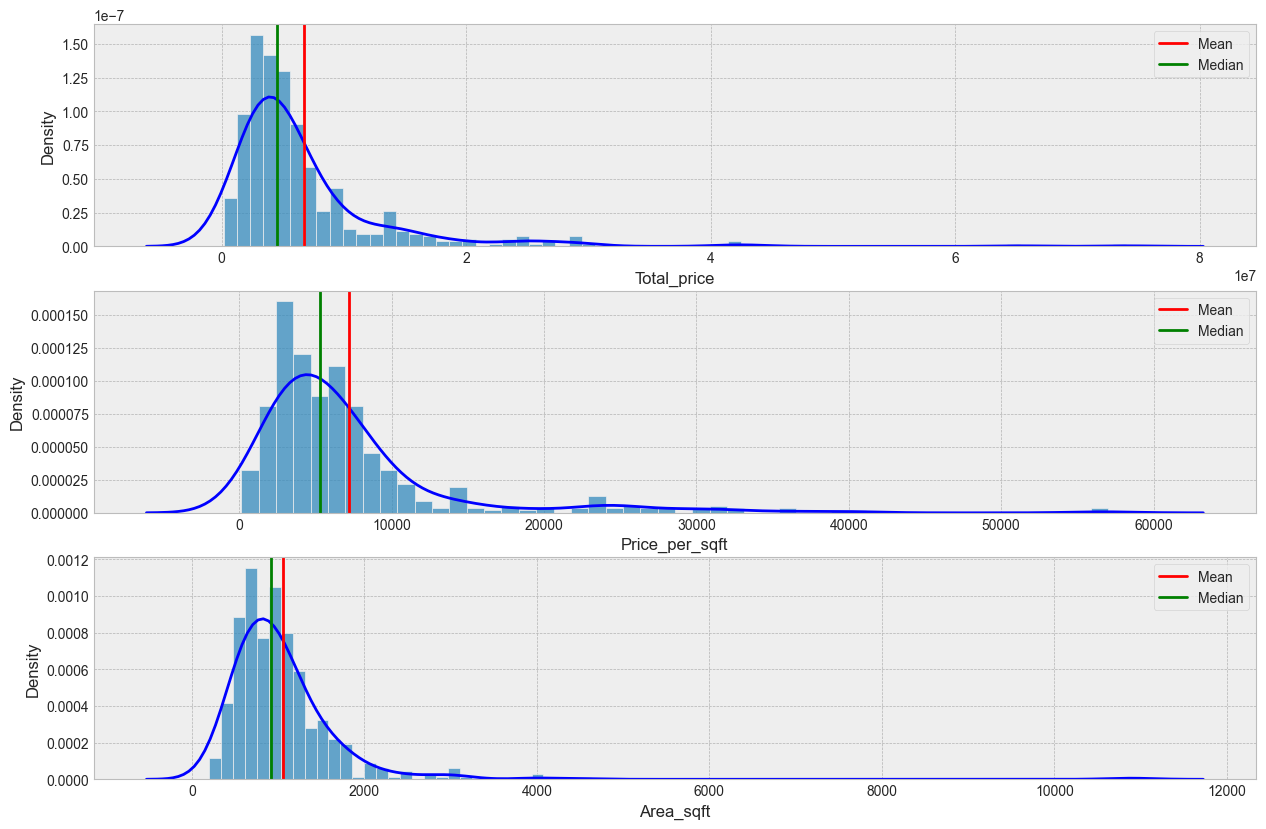

In [55]:
plt.figure(figsize = (15,10),dpi = 100)

plt.subplot(3,1,1)
sns.histplot(cities.Total_price, stat = 'density')
sns.kdeplot(cities.Total_price, color = 'blue')
plt.axvline(cities.Total_price.mean(), color ='red', label = 'Mean')
plt.axvline(cities.Total_price.median(), color ='green', label = 'Median')
plt.legend();

plt.subplot(3,1,2)
sns.histplot(cities.Price_per_sqft, stat = 'density')
sns.kdeplot(cities.Price_per_sqft, color = 'blue')
plt.axvline(cities.Price_per_sqft.mean(), color ='red', label = 'Mean')
plt.axvline(cities.Price_per_sqft.median(), color ='green', label = 'Median')
plt.legend();

plt.subplot(3,1,3)
sns.histplot(cities.Area_sqft, stat = 'density')
sns.kdeplot(cities.Area_sqft, color = 'blue')
plt.axvline(cities.Area_sqft.mean(), color ='red', label = 'Mean')
plt.axvline(cities.Area_sqft.median(), color ='green', label = 'Median')
plt.legend();

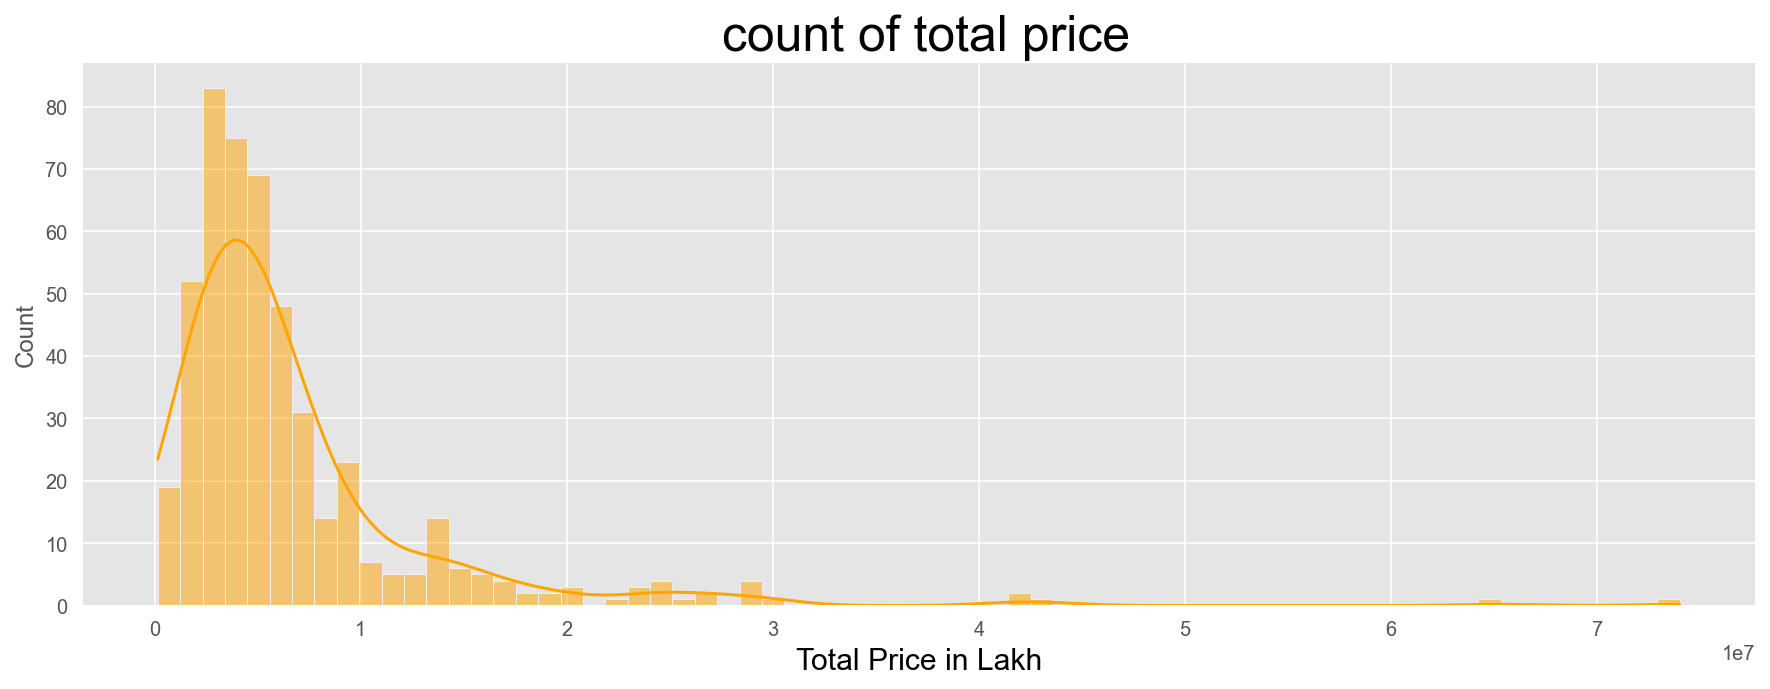

In [182]:
# Histogram showing count of total price in DataFrame

plt.figure(figsize=(15,5))

plt.title(' count of total price', fontsize = 25, color = 'black')
plt.xlabel('Total Price in Lakh',fontsize = 15, color = 'black')

sns.histplot( x = cities.Total_price, data = cities, color = 'orange', kde = True);

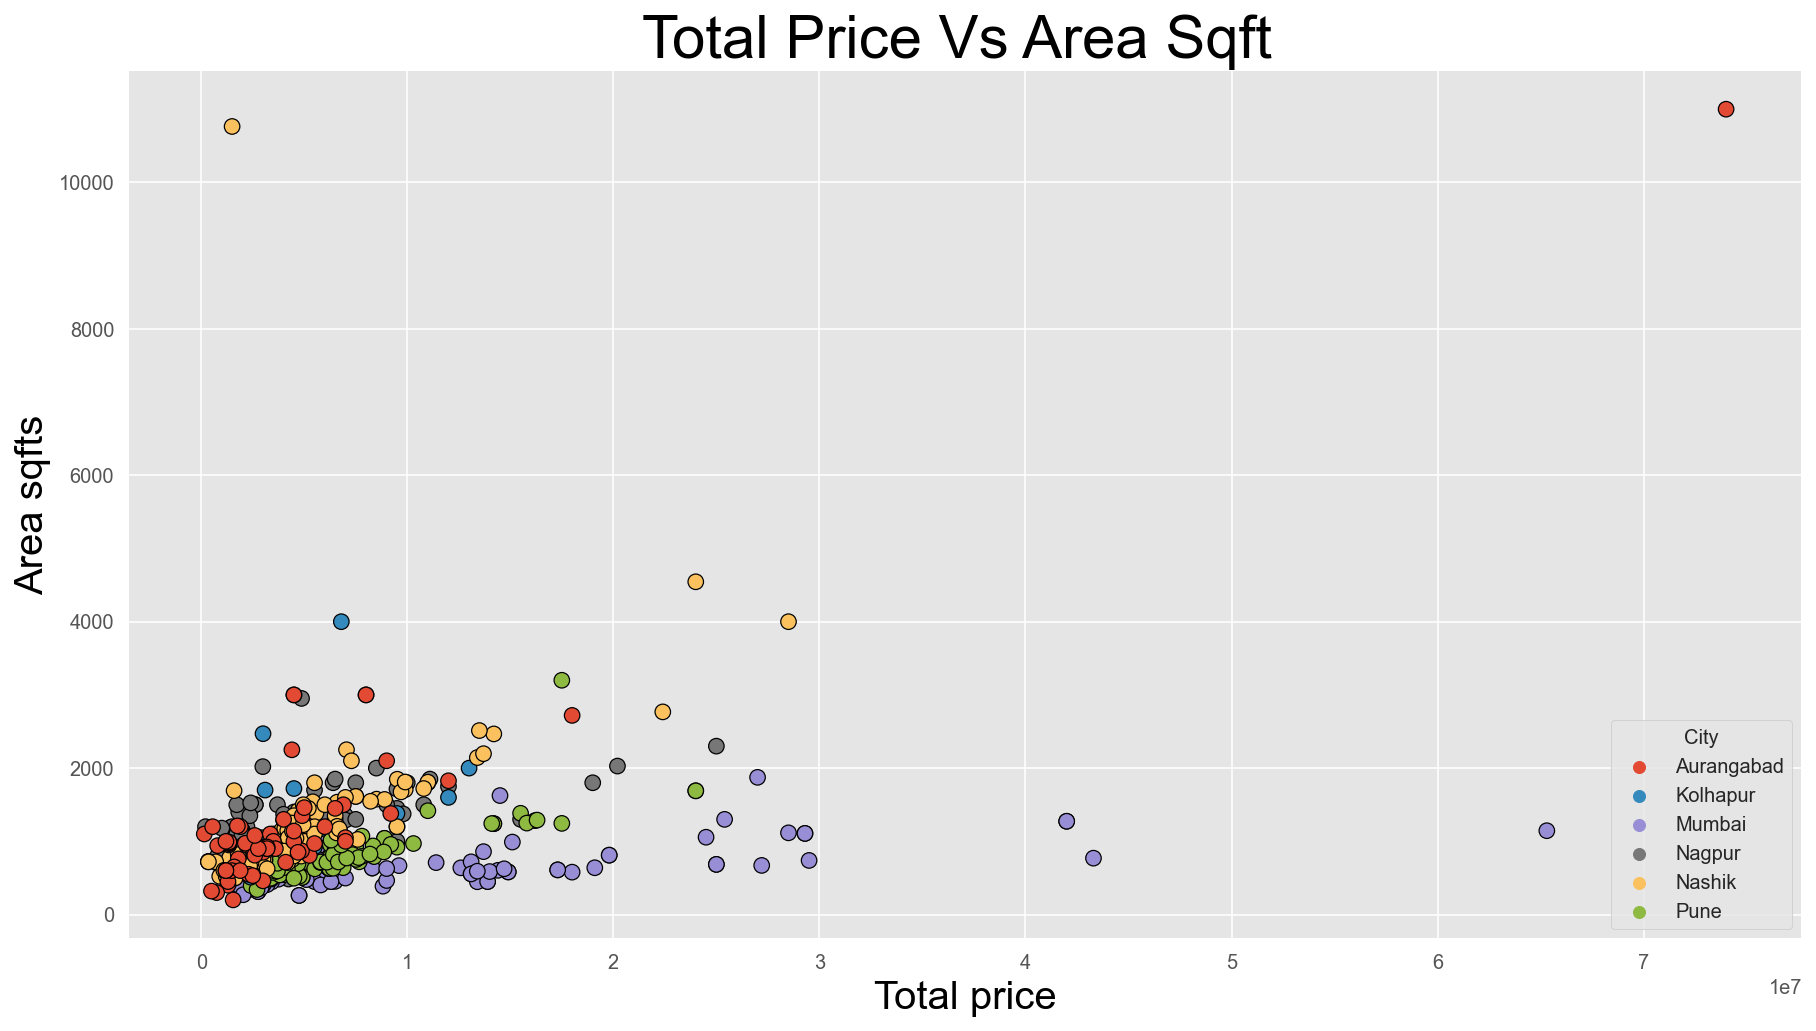

In [178]:
# totalprice VS Area Sqft

plt.figure(figsize=(15,8))
sns.scatterplot(y = 'Area_sqft' , x ='Total_price',hue = 'City', markers = "^",data = cities, edgecolor ="black", s = 60 )
plt.title('Total Price Vs Area Sqft ', fontsize = 30, color = 'black')
plt.xlabel('Total price',fontsize = 20, color = 'black')
plt.ylabel('Area sqfts',fontsize = 20, color = 'black');


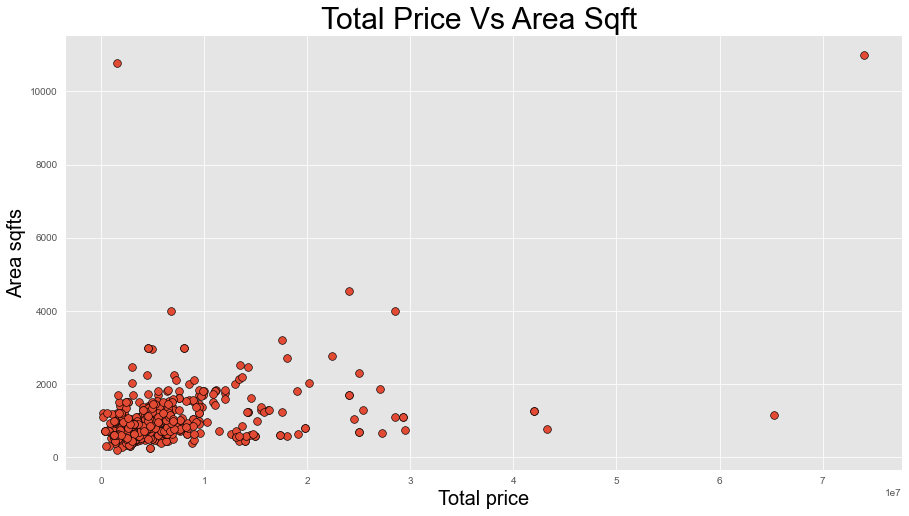

In [76]:
# total price Vs Area sqft

plt.figure(figsize=(15,8))
sns.scatterplot(y = 'Area_sqft' , x ='Total_price',data = cities, edgecolor ="black", s = 60 )
plt.title('Total Price Vs Area Sqft ', fontsize = 30, color = 'black')
plt.xlabel('Total price',fontsize = 20, color = 'black')
plt.ylabel('Area sqfts',fontsize = 20, color = 'black');


In [14]:
cities

,Seller_Name,Seller_type,Property_type,Location,City,Total_price,Price_per_sqft,Area_sqft,Construction_status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000,3455,1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,3153000,3500,901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,Buti Bori,Nagpur,1449000,2636,550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,Jamtha,Nagpur,2295000,2342,980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000,3297,1071,Under Construction
...,...,...,...,...,...,...,...,...,...
483,user6805,OWNER,1 BHK Villa,Shendra MIDC,Aurangabad,1889999,3150,600,Under Construction
484,Gandhi Rajput,OWNER,Residential Plot,Harsul,Aurangabad,555000,462,1200,Resale
485,shivaji patil,OWNER,Residential Plot,Shendra MIDC,Aurangabad,500000,1562,320,Resale
486,Sanket Jagdale,OWNER,1 BHK Independent House,Farola,Aurangabad,1200000,2000,600,Ready to move


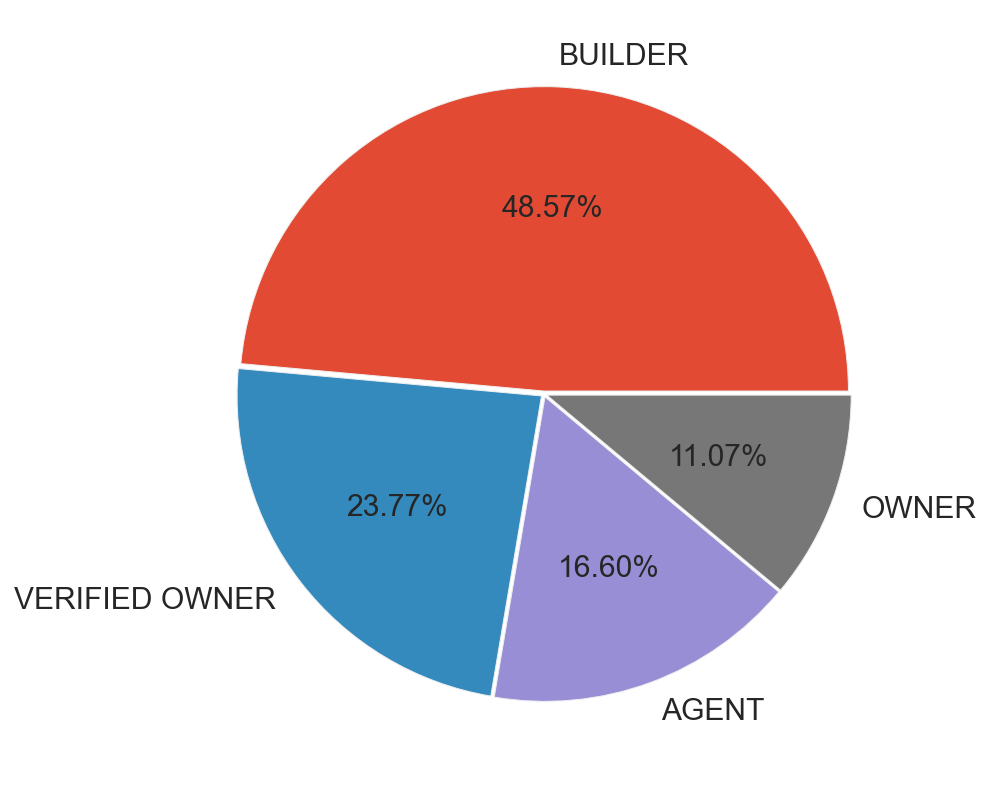

In [177]:
# Pie chart to show the cities seller type

plt.figure(figsize = (7,7))
plt.pie(x = cities.Seller_type.value_counts(),
        labels = cities.Seller_type.value_counts().index, autopct = '%.2f%%',explode=[0.01,0.01,0.01,0.01]
        ,textprops={"fontsize":15})
plt.show();

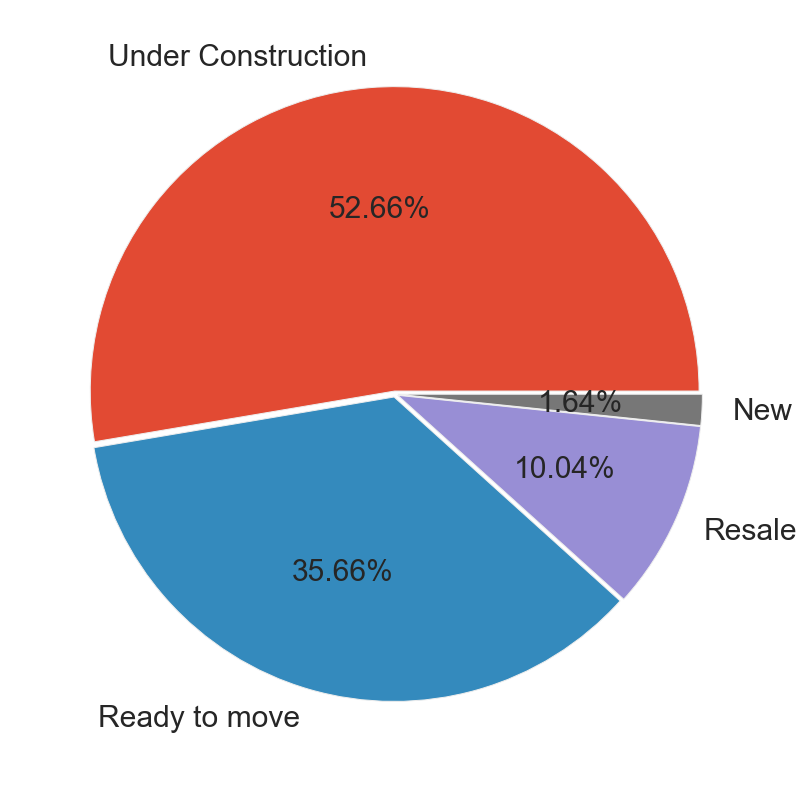

In [176]:
# Pie chart to show cities construction status

plt.figure(figsize = (7,7))
plt.pie(x = cities.Construction_status.value_counts(),
        labels = cities.Construction_status.value_counts().index, autopct = '%.2f%%', explode=[0.01,0.01,0.01,0.01]
       ,textprops={"fontsize":15})
plt.show();

---

In [78]:
# Identify the outliers

Q1, Q2, Q3 = tuple(cities.Total_price.quantile(q = [0.25,0.5,0.75]).values)

In [79]:
print(Q1, Q2, Q3)

3000000.0 4501500.0 7303500.0


In [80]:
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

4303500.0 13758750.0 -3455250.0


In [88]:
(cities[(cities.Total_price > UL) | (cities.Total_price < LL)]).count()         

Seller_Name            50
Seller_type            50
Property_type          50
Location               50
City                   50
Total_price            50
Price_per_sqft         50
Area_sqft              50
Construction_status    50
dtype: int64

In [14]:
# Binning

x= pd.cut(cities.Total_price, bins = 5, labels=['very low','low','Avg','high','very high'])


In [162]:
cities.Total_price.min()
cities.Total_price.max()

150000

74000000

In [171]:
# binning

x= pd.cut(cities.Total_price, bins =[150000,500000,10000000,30000000,50000000,74000000],labels=['very low','low','Avg','high','very high']).value_counts()

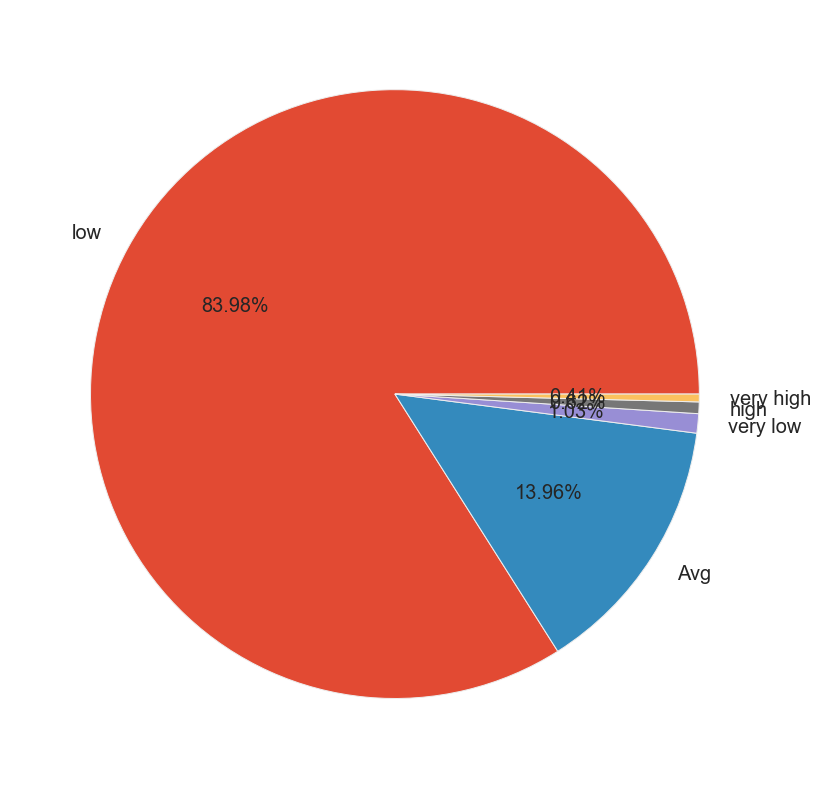

In [172]:
plt.figure(figsize = (7,7))
plt.pie(x = x,
        labels = x.index, autopct = '%.2f%%')
plt.show();

-------

In [26]:
city = cities.City.value_counts().index
count = cities.City.value_counts().values

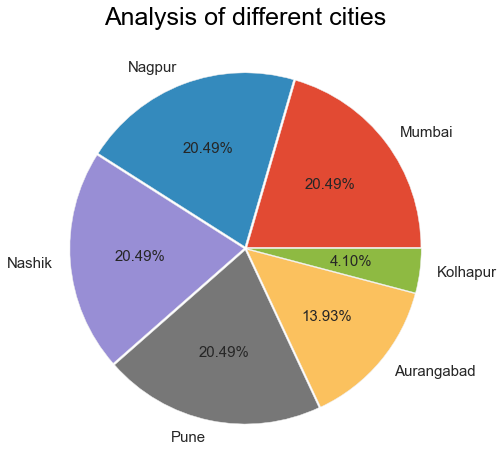

In [41]:
# pie chart to show Analysis of different cities

plt.figure(figsize = (8,8))
plt.pie(x = cities.City.value_counts().values,
        labels = cities.City.value_counts().index, autopct = '%.2f%%',explode= [0.01,0.01,0.01,0.01,0.01,0.01]
       ,textprops={"fontsize":15})
plt.title('Analysis of different cities', fontsize = 25, color = 'black')

plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


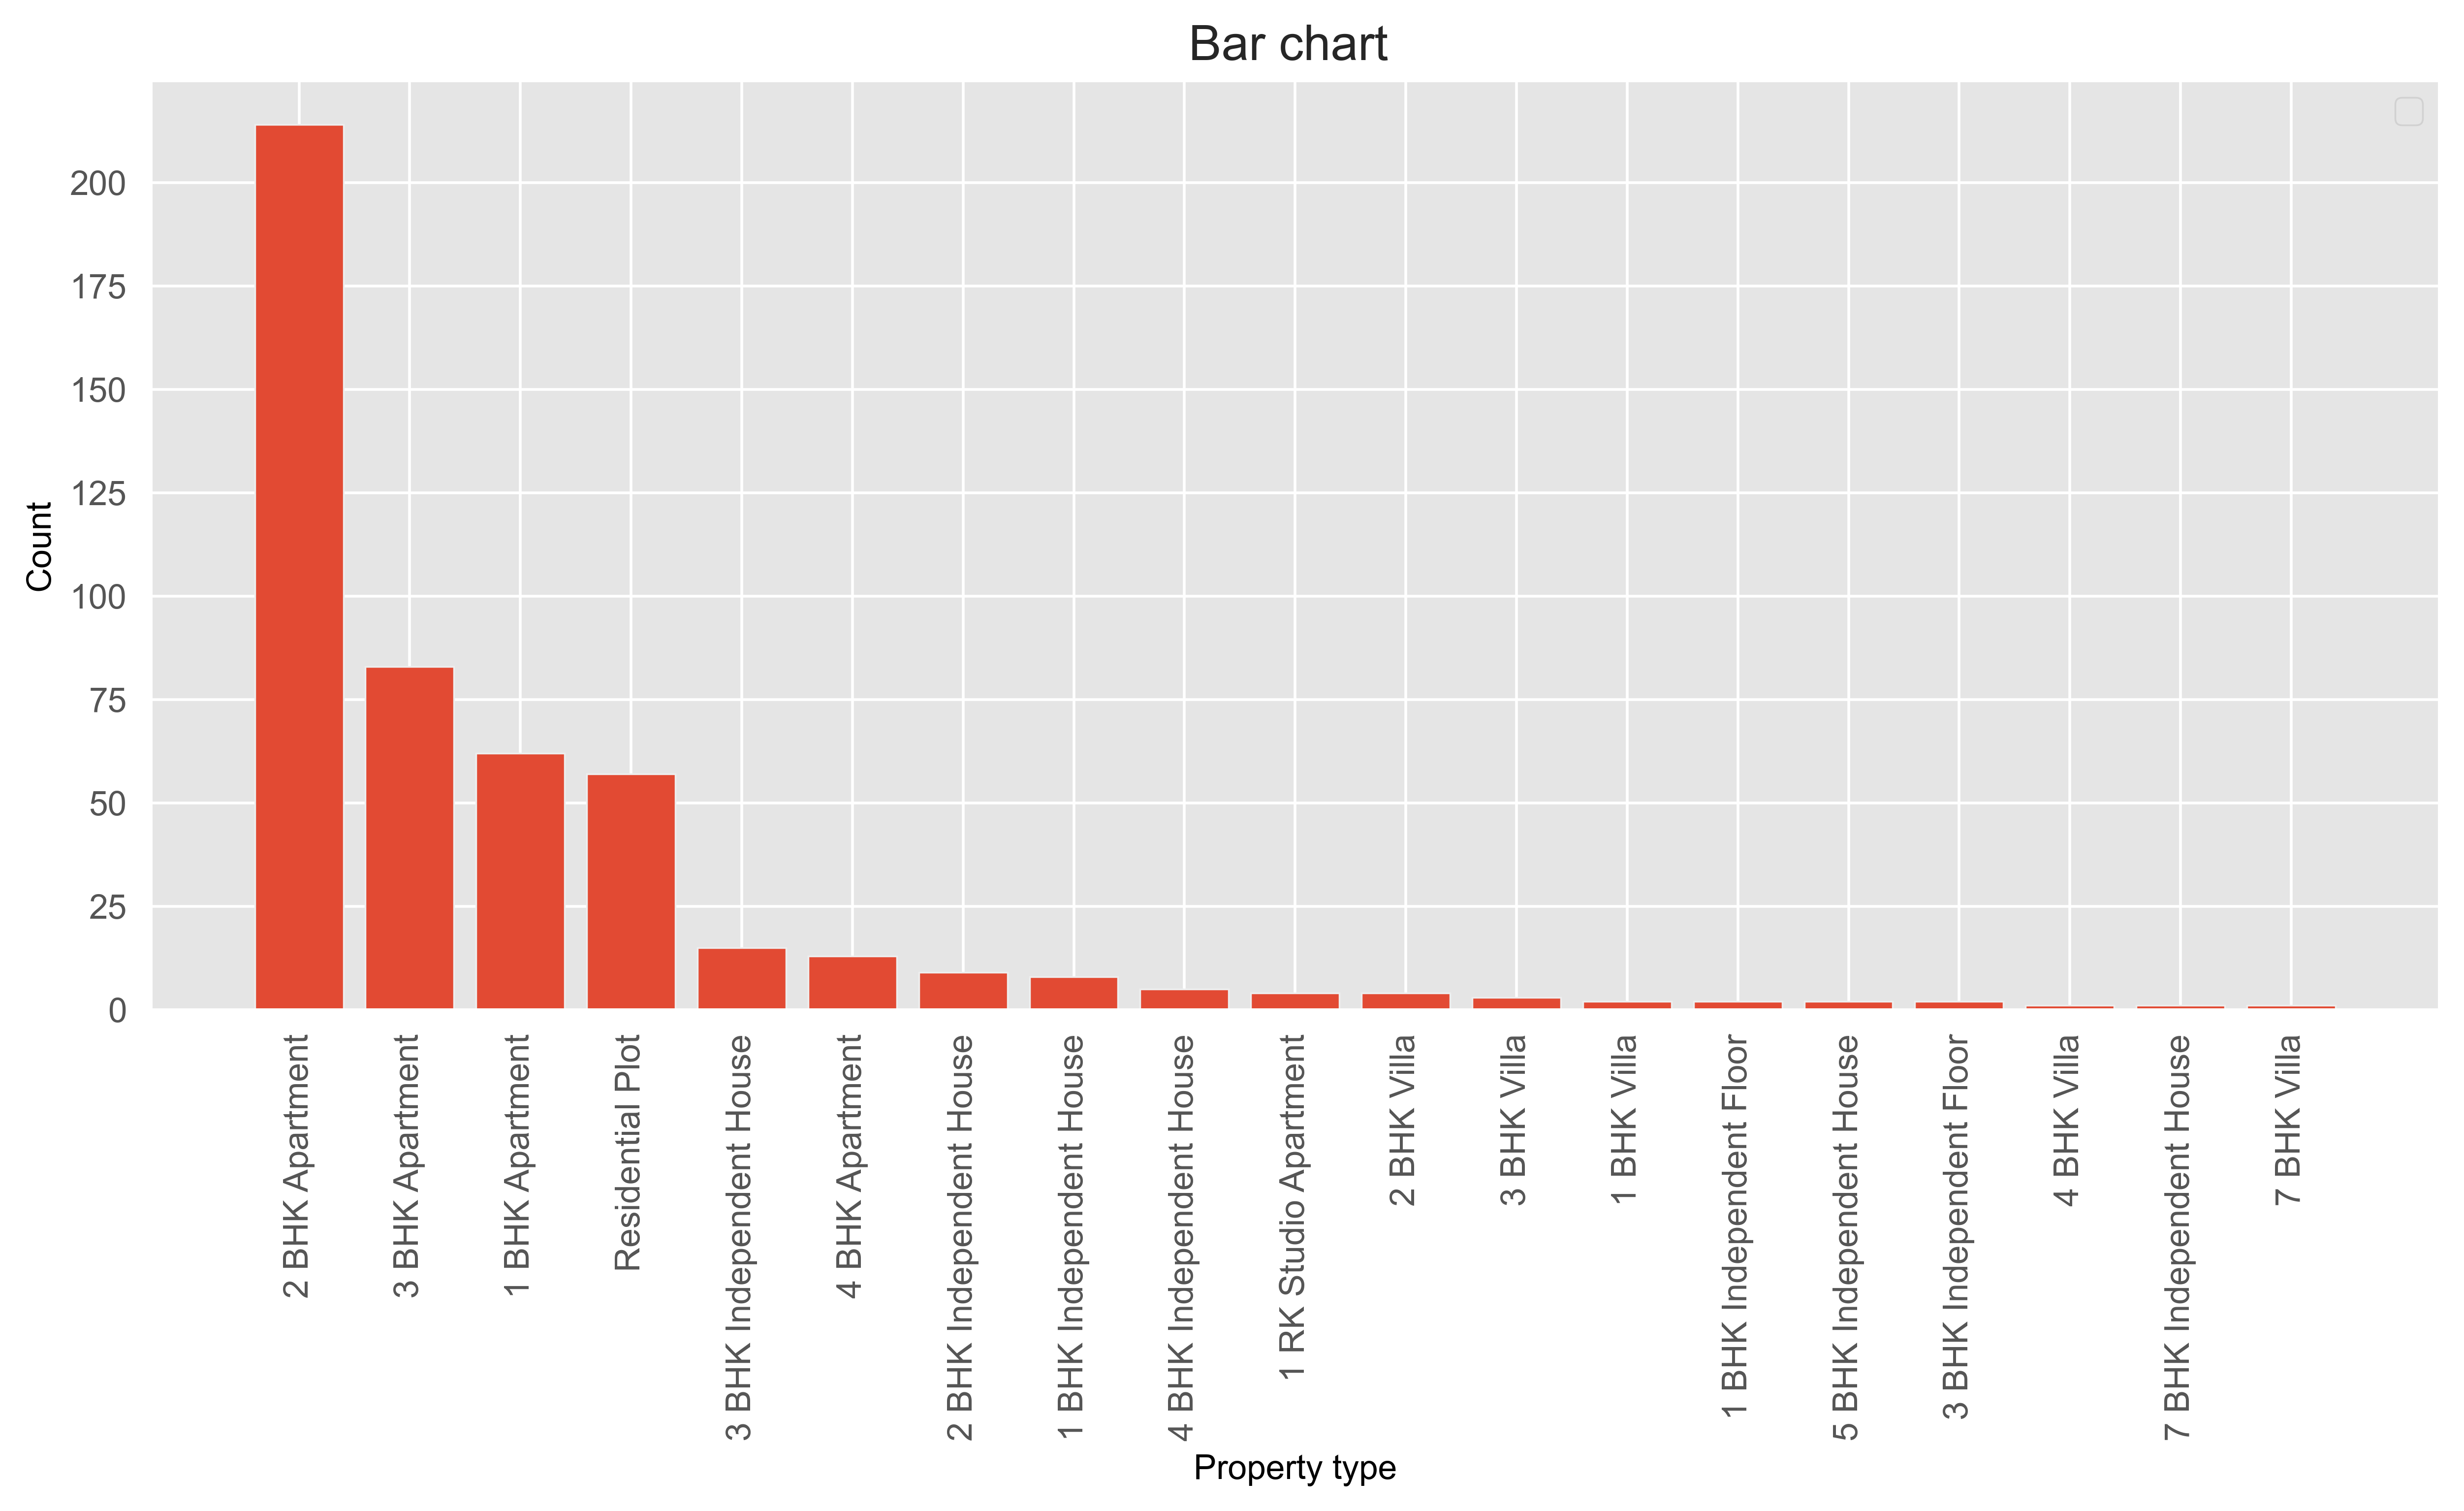

In [61]:
# bar chart

Property = cities.Property_type.value_counts().index
count = cities.Property_type.value_counts().values
 
plt.figure(figsize=(12,5), dpi = 500)
plt.bar(Property,count)

plt.title('Bar chart ')
plt.xlabel('Property type',fontsize = 10, color = 'black')
plt.ylabel('Count',fontsize = 10, color = 'black')
plt.xticks(rotation = 90)

plt.legend()
plt.show();

In [54]:
cities.head()

,Seller_Name,Seller_type,Property_type,Location,City,Total_price,Price_per_sqft,Area_sqft,Construction_status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000,3455,1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,3153000,3500,901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,Buti Bori,Nagpur,1449000,2636,550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,Jamtha,Nagpur,2295000,2342,980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000,3297,1071,Under Construction


In [72]:
cities.Price_per_sqft.value_counts().sum()
cities.Area_sqft.value_counts().sum()
cities.Price_per_sqft.min()
cities.Area_sqft.min()
cities.Price_per_sqft.max()
cities.Area_sqft.max()

(cities.Area_sqft.max()-cities.Area_sqft.min())/488
(cities.Price_per_sqft.max()-cities.Price_per_sqft.min())/488

488

488

136

200

57031

11000

22.131147540983605

116.58811475409836

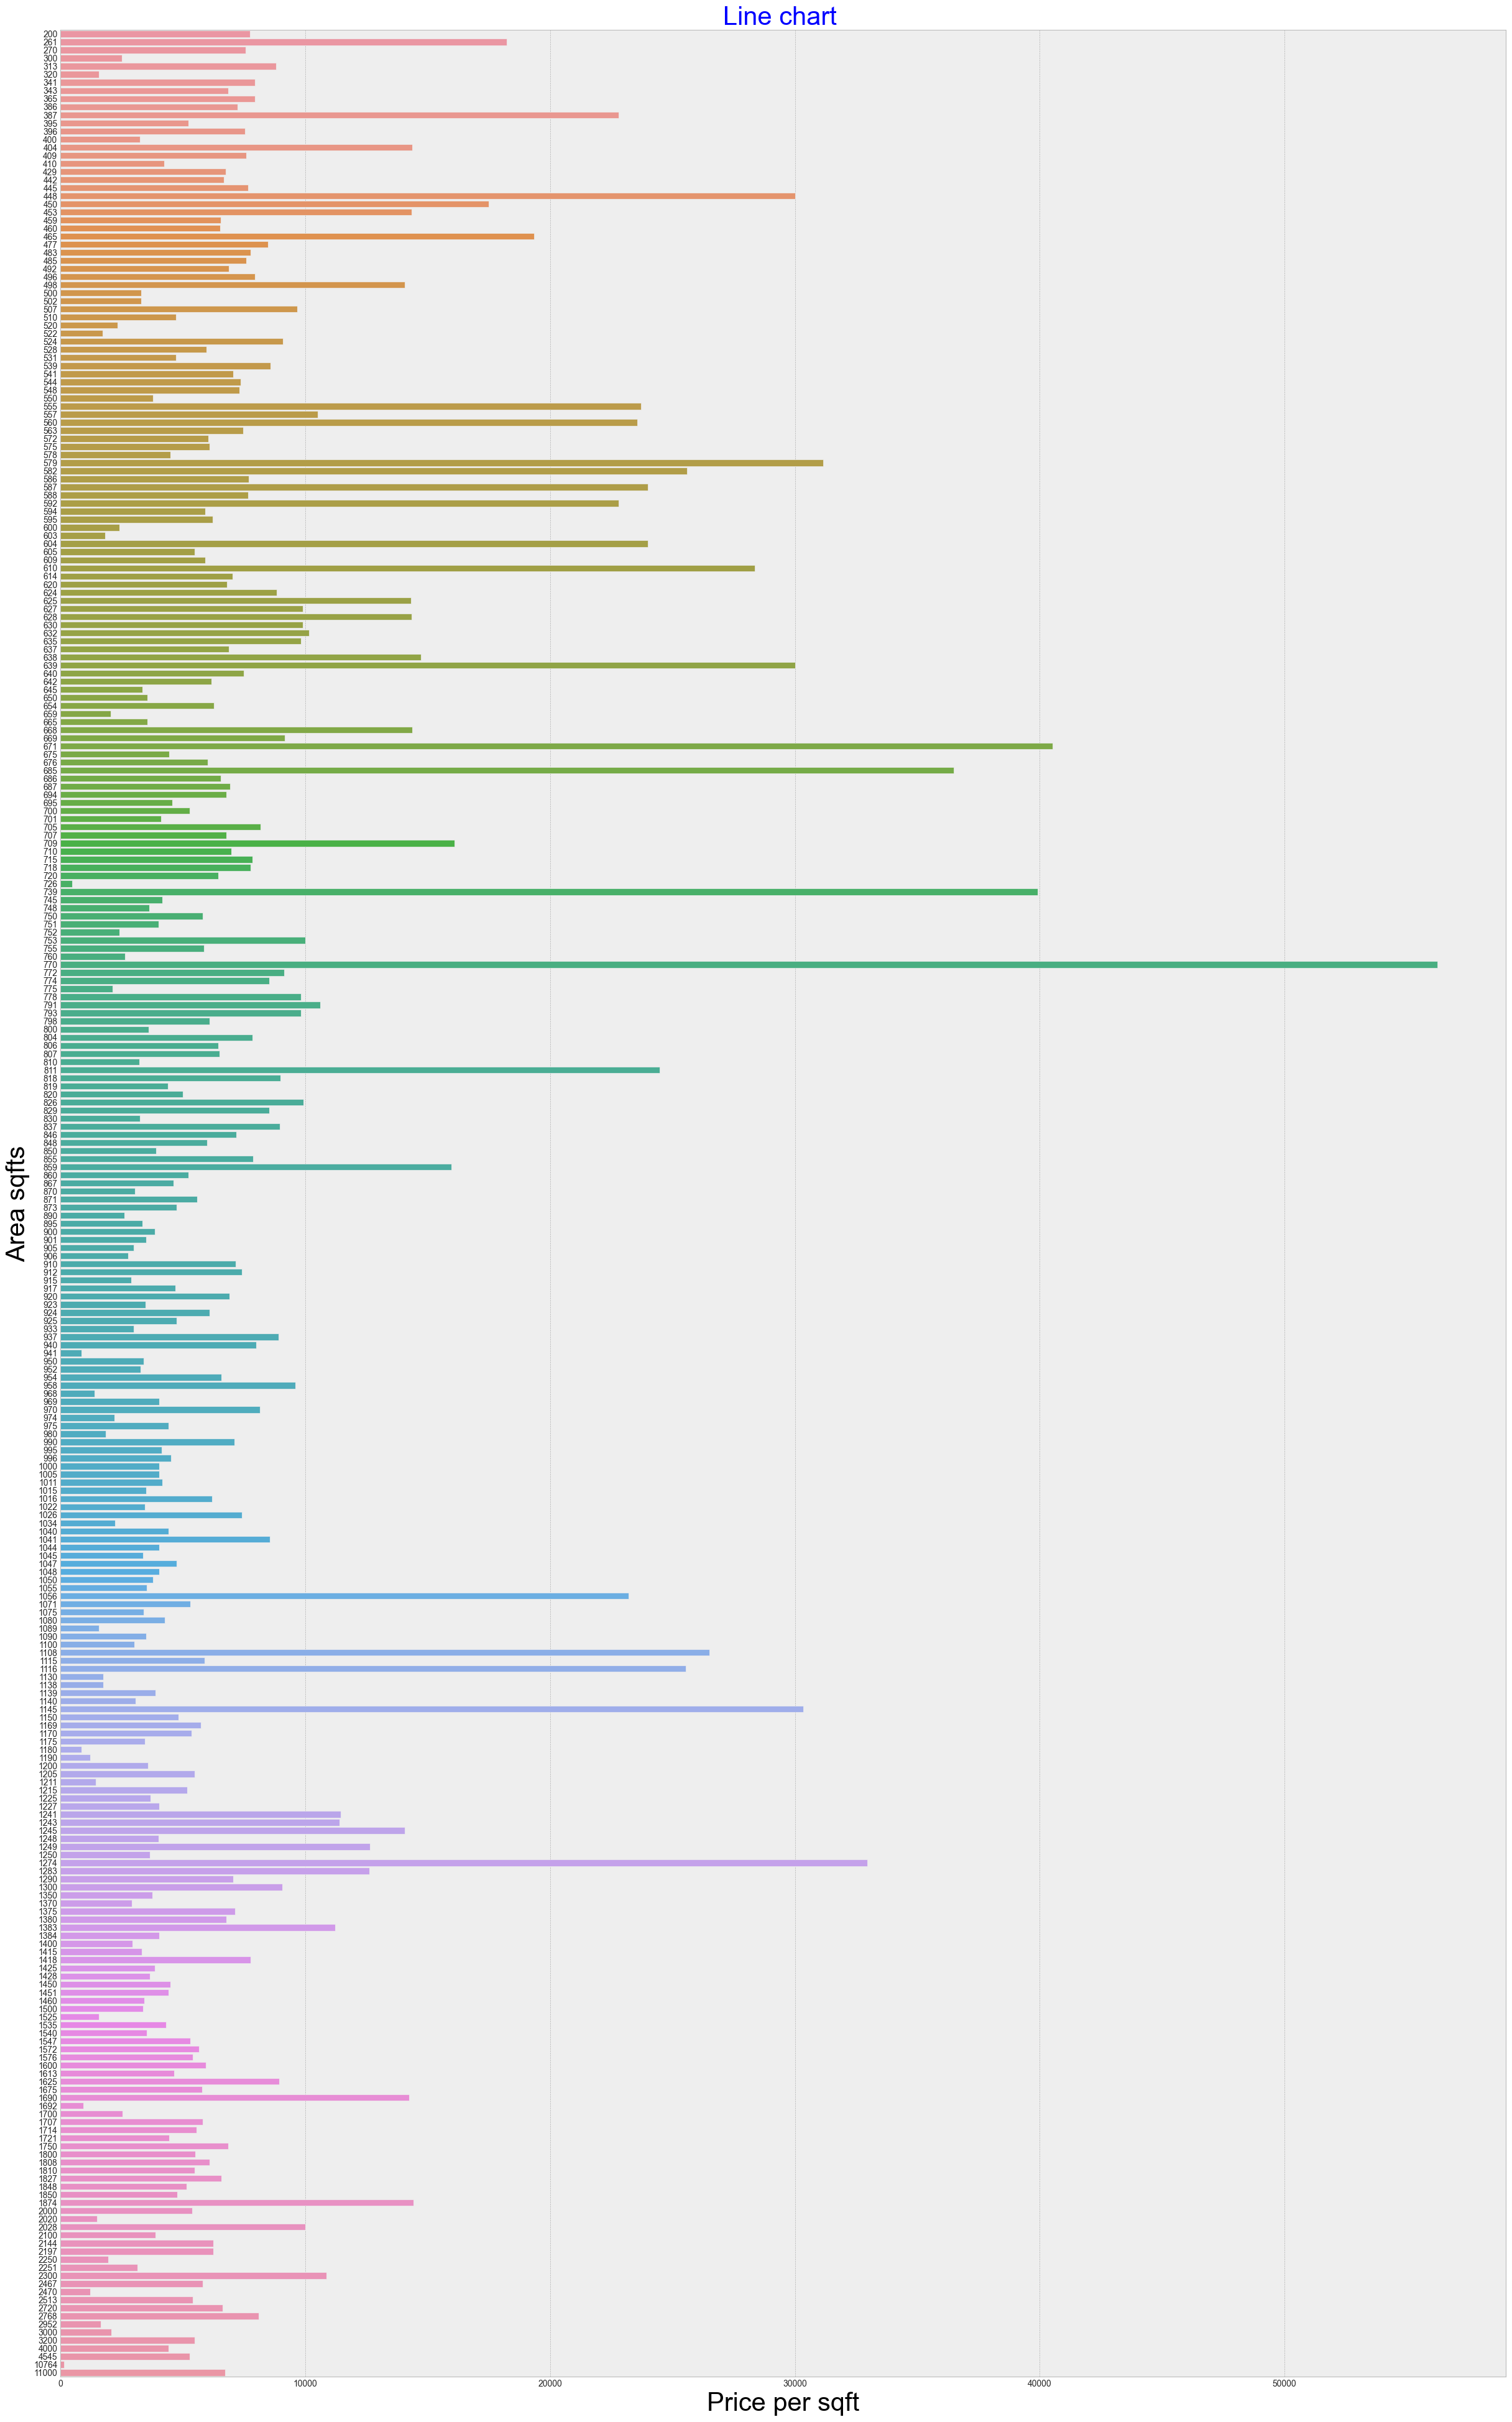

In [92]:
## Biverient 

plt.figure(figsize=(30,50),dpi = 100)
sns.barplot(y='Area_sqft', x='Price_per_sqft', data= cities, ci= False, orient = 'h')
plt.title('Line chart ', fontsize = 30, color = 'b')
plt.xlabel('Price per sqft',fontsize = 30, color = 'black')
plt.ylabel('Area sqfts',fontsize = 30, color = 'black');


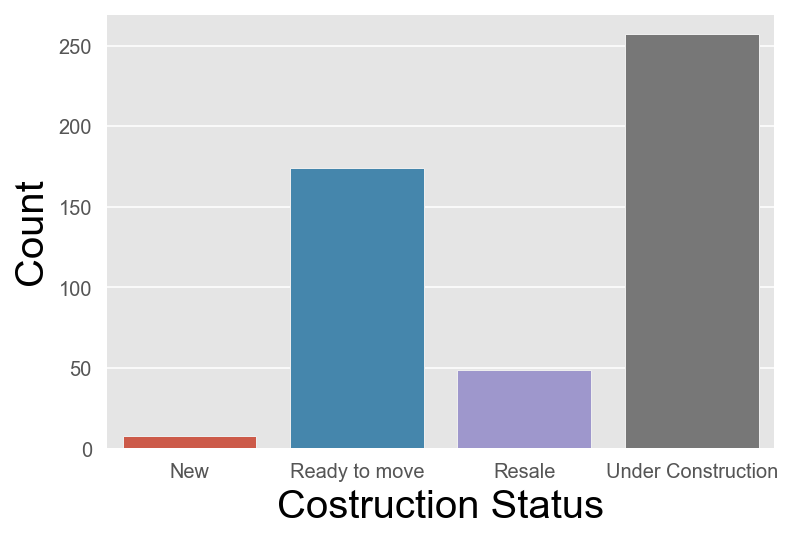

In [142]:


sns.countplot(x = 'Construction_status', data = cities)
#plt.title('Construction Status', fontsize = 25, color = 'black')
plt.xlabel('Costruction Status',fontsize = 20, color = 'black')
plt.ylabel('Count',fontsize = 20, color = 'black');


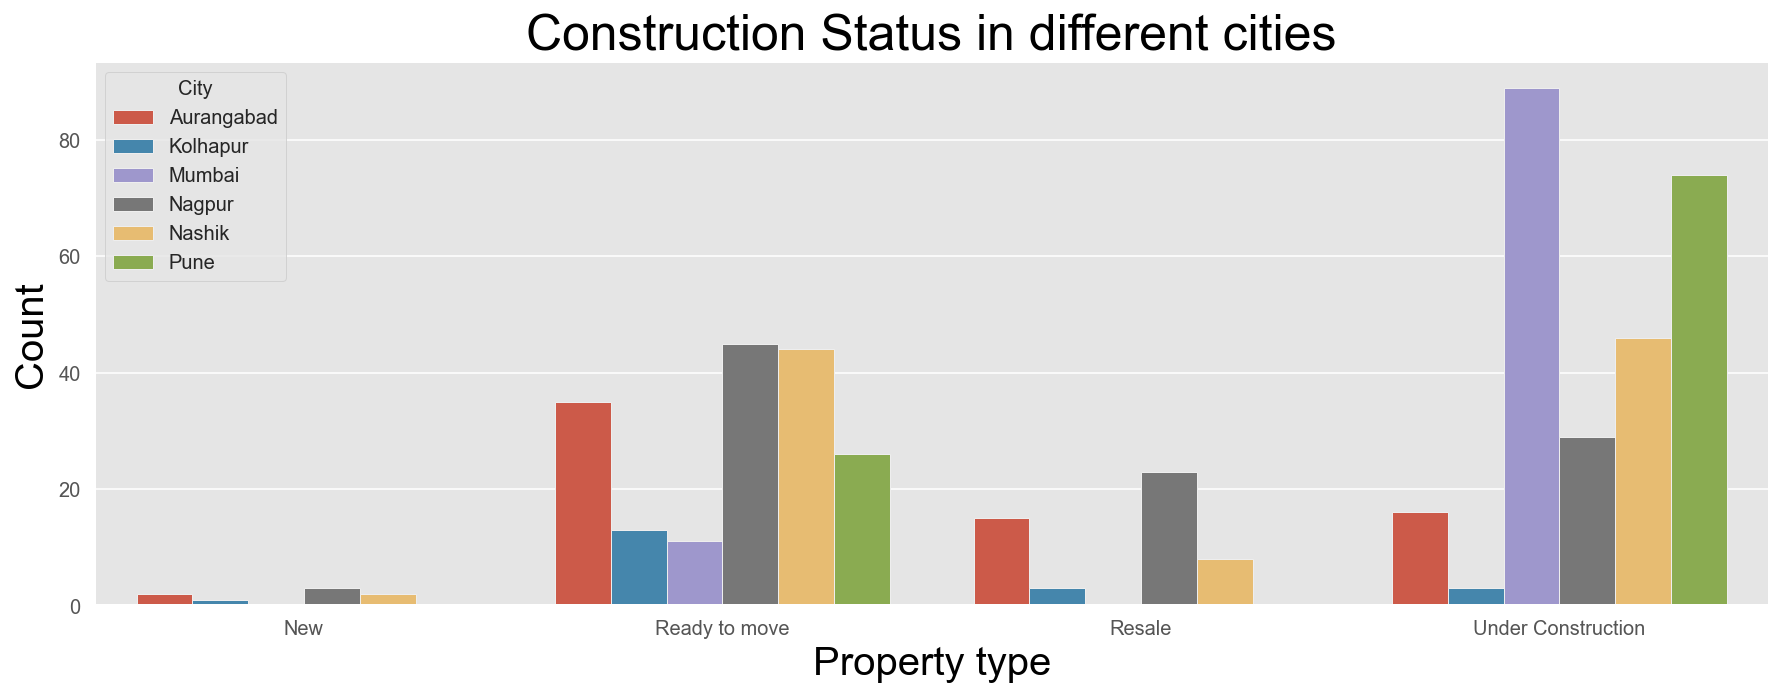

In [140]:
# Construction Status in different cities

plt.figure(figsize =(15,5))
# colors = ["c", 'm','r','y','g','b']
sns.countplot(x= 'Construction_status', hue = 'City', data = cities);
plt.title('Construction Status in different cities', fontsize = 25, color = 'black')
plt.xlabel('Property type',fontsize = 20, color = 'black')
plt.ylabel('Count',fontsize = 20, color = 'black');


In [93]:
# multiverient

CPU times: total: 2.11 s
Wall time: 2.16 s


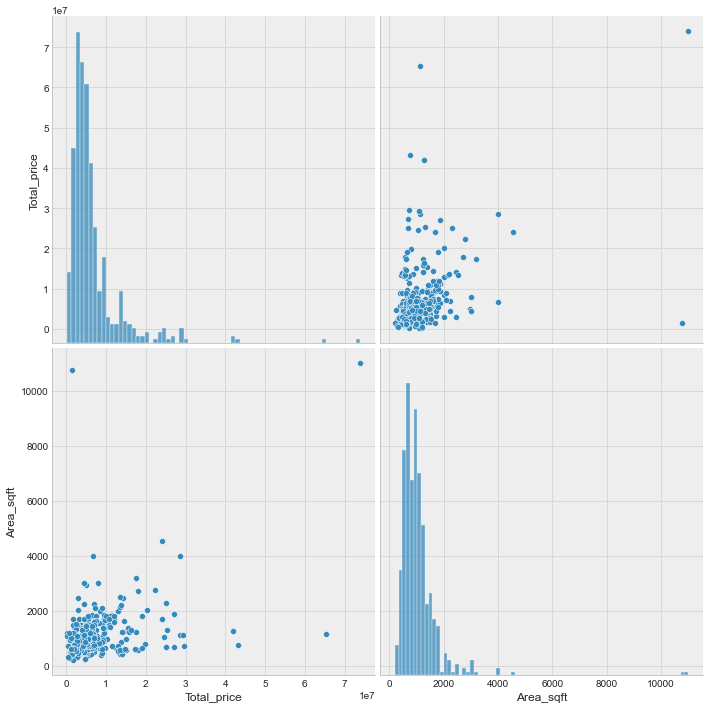

In [51]:
%%time
# the above command is a magic command to display all time in seconds
sns.pairplot(cities, size = 5);

In [76]:
corr = cities.corr()

In [77]:
corr

,Total_price,Price_per_sqft,Area_sqft
Total_price,1.000000,0.735824,0.379485
Price_per_sqft,0.735824,1.000000,-0.153407
Area_sqft,0.379485,-0.153407,1.000000


In [25]:
i= pd.crosstab(index=df_prop.prop_name,columns=df_prop.city,margins=True,)

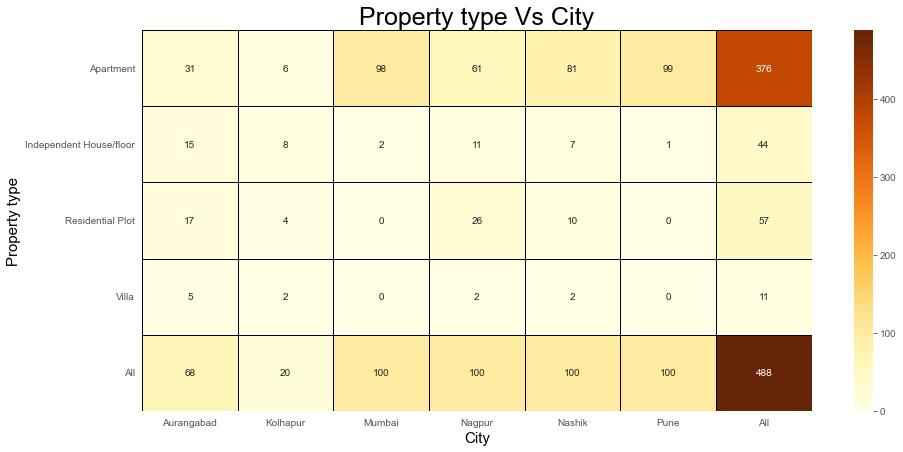

In [42]:
plt.figure(figsize=(15,7))
sns.heatmap(i, annot=True, fmt = 'd', linewidths=0.5, cmap= 'YlOrBr', linecolor='black');
plt.title('Property type Vs City', fontsize = 25, color = 'black')
plt.xlabel('City',fontsize = 15, color = 'black')
plt.ylabel('Property type',fontsize = 15, color = 'black');

In [100]:
cities.head()

,Seller_Name,Seller_type,Property_type,Location,City,Total_price,Price_per_sqft,Area_sqft,Construction_status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000,3455,1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,3153000,3500,901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,Buti Bori,Nagpur,1449000,2636,550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,Jamtha,Nagpur,2295000,2342,980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,3531000,3297,1071,Under Construction


In [16]:
cities.Property_type.value_counts().index
cities.Property_type.count()

CategoricalIndex(['2 BHK Apartment', '3 BHK Apartment', '1 BHK Apartment',
                  'Residential Plot', '3 BHK Independent House',
                  '4 BHK Apartment', '2 BHK Independent House',
                  '1 BHK Independent House', '4 BHK Independent House',
                  '1 RK Studio Apartment', '2 BHK Villa', '3 BHK Villa',
                  '1 BHK Villa', '1 BHK Independent Floor',
                  '5 BHK Independent House', '3 BHK Independent Floor',
                  '4 BHK Villa', '7 BHK Independent House', '7 BHK Villa'],
                 categories=['1 BHK Apartment', '1 BHK Independent Floor', '1 BHK Independent House', '1 BHK Villa', ..., '5 BHK Independent House', '7 BHK Independent House', '7 BHK Villa', 'Residential Plot'], ordered=False, dtype='category')

488

In [17]:
i= cities.Property_type.value_counts().index.str.split()
i

Index([           ['2', 'BHK', 'Apartment'],
                  ['3', 'BHK', 'Apartment'],
                  ['1', 'BHK', 'Apartment'],
                    ['Residential', 'Plot'],
       ['3', 'BHK', 'Independent', 'House'],
                  ['4', 'BHK', 'Apartment'],
       ['2', 'BHK', 'Independent', 'House'],
       ['1', 'BHK', 'Independent', 'House'],
       ['4', 'BHK', 'Independent', 'House'],
         ['1', 'RK', 'Studio', 'Apartment'],
                      ['2', 'BHK', 'Villa'],
                      ['3', 'BHK', 'Villa'],
                      ['1', 'BHK', 'Villa'],
       ['1', 'BHK', 'Independent', 'Floor'],
       ['5', 'BHK', 'Independent', 'House'],
       ['3', 'BHK', 'Independent', 'Floor'],
                      ['4', 'BHK', 'Villa'],
       ['7', 'BHK', 'Independent', 'House'],
                      ['7', 'BHK', 'Villa']],
      dtype='object')

In [14]:
for x in i:
    y = x[-1]
    y

'Apartment'

'Apartment'

'Apartment'

'Plot'

'House'

'Apartment'

'House'

'House'

'House'

'Apartment'

'Villa'

'Villa'

'Villa'

'Floor'

'House'

'Floor'

'Villa'

'House'

'Villa'

In [88]:
 # def property_type(i):
 #     k=[]
 #     for i in cities.Property_type.str.split():
 #         for x[-1] in i:
 #             if (x[-1] == 'Apartment'):
 #                 x = print("Apartment")
 #                 k.append(x)
 #             elif(x[-1] == "Plot"):
 #                 x= print("Residential Plot")
 #                 k.append(x)
 #             elif (x[-1] == "Villa"):
 #                 x = print("Villa")
 #                 k.append(x)
 #             elif ((x[-1] == 'Floor') or (x[-1] == 'House')):
 #                 x = print("Independent House/floor")
 #                 k.append(x)
 #         return k

In [16]:
cities.Property_type.str.split()

0               [2, BHK, Apartment]
1               [2, BHK, Apartment]
2               [1, BHK, Apartment]
3               [2, BHK, Apartment]
4               [2, BHK, Apartment]
                   ...             
483                 [1, BHK, Villa]
484             [Residential, Plot]
485             [Residential, Plot]
486    [1, BHK, Independent, House]
487                 [3, BHK, Villa]
Name: Property_type, Length: 488, dtype: object

In [13]:
prop_type = []
for i in cities.Property_type.str.split():
    a = i[-1]
    prop_type.append(a)
print(prop_type)




['Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Villa', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Plot', 'Plot', 'Plot', 'Apartment', 'Apartment', 'Apartment', 'Plot', 'Apartment', 'Plot', 'Plot', 'Apartment', 'Apartment', 'House', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Plot', 'Plot', 'Plot', 'Floor', 'Villa', 'Apartment', 'Apartment', 'Apartment', 'Floor', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'House', 'Apartment', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'House', 'Plot', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Plot', 'Apartment', 'Apartment', 'House', 'House', 'House', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'House'

In [14]:
df_prop = pd.DataFrame(prop_type)
#df_prop.rename(columns = {"0": "prop_name"})


df_prop.columns = ['prop_name']
#df_prop
prop_name = df_prop.prop_name.str.replace('Plot', 'Residential Plot').str.replace('House', 'Independent House/floor').str.replace('Floor', 'Independent House/floor')
prop_name

0                    Apartment
1                    Apartment
2                    Apartment
3                    Apartment
4                    Apartment
                ...           
483                      Villa
484           Residential Plot
485           Residential Plot
486    Independent House/floor
487                      Villa
Name: prop_name, Length: 488, dtype: object

In [20]:
df_prop

,prop_name
0,Apartment
1,Apartment
2,Apartment
3,Apartment
4,Apartment
...,...
483,Villa
484,Plot
485,Plot
486,House


In [21]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Seller_Name          488 non-null    category
 1   Seller_type          488 non-null    category
 2   Property_type        488 non-null    category
 3   Location             488 non-null    category
 4   City                 488 non-null    category
 5   Total_price          488 non-null    int64   
 6   Price_per_sqft       488 non-null    int64   
 7   Area_sqft            488 non-null    int64   
 8   Construction_status  488 non-null    category
dtypes: category(6), int64(3)
memory usage: 31.9 KB


In [15]:
city = cities.City
location = cities.Location
price = cities.Total_price
seller_type = cities.Seller_type
cons_status = cities.Construction_status
area_sqft = cities.Area_sqft
price_per_sqft = cities.Price_per_sqft
seller_name = cities.Seller_Name
property_type = cities.Property_type
Area = cities.Area_sqft


In [16]:
df_prop['city'] = city
df_prop['location'] = location
df_prop['prop_name'] = prop_name
df_prop['price'] = price
df_prop['seller_type'] = seller_type
df_prop['cons_status'] = cons_status
df_prop['area_sqft'] = area_sqft
df_prop['cons_status'] = seller_name
df_prop['area_sqft'] = property_type
df_prop['Area'] = Area

#prop_name = df_prop.prop_name.str.replace('Plot', 'Residential Plot').str.replace('House', 'Independent House/floor').str.replace('Floor', 'Independent House/floor')


In [17]:
df_prop.city.unique()

['Nagpur', 'Mumbai', 'Pune', 'Kolhapur', 'Nashik', 'Aurangabad']
Categories (6, object): ['Aurangabad', 'Kolhapur', 'Mumbai', 'Nagpur', 'Nashik', 'Pune']

In [27]:
df_prop

,prop_name,city,location,price,seller_type,cons_status,area_sqft,Area
0,Apartment,Nagpur,Besa,3531000,BUILDER,Shree Laxmi Venture,2 BHK Apartment,1022
1,Apartment,Nagpur,Parsodi,3153000,BUILDER,Devprath Constructions LLP,2 BHK Apartment,901
2,Apartment,Nagpur,Buti Bori,1449000,BUILDER,Sirsikar Developers And Builders Pvt Ltd,1 BHK Apartment,550
3,Apartment,Nagpur,Jamtha,2295000,BUILDER,Sandesh Infrastrctures Pvt ltd,2 BHK Apartment,980
4,Apartment,Nagpur,Besa,3531000,BUILDER,Shree Laxmi Venture,2 BHK Apartment,1071
...,...,...,...,...,...,...,...,...
483,Villa,Aurangabad,Shendra MIDC,1889999,OWNER,user6805,1 BHK Villa,600
484,Residential Plot,Aurangabad,Harsul,555000,OWNER,Gandhi Rajput,Residential Plot,1200
485,Residential Plot,Aurangabad,Shendra MIDC,500000,OWNER,shivaji patil,Residential Plot,320
486,Independent House/floor,Aurangabad,Farola,1200000,OWNER,Sanket Jagdale,1 BHK Independent House,600


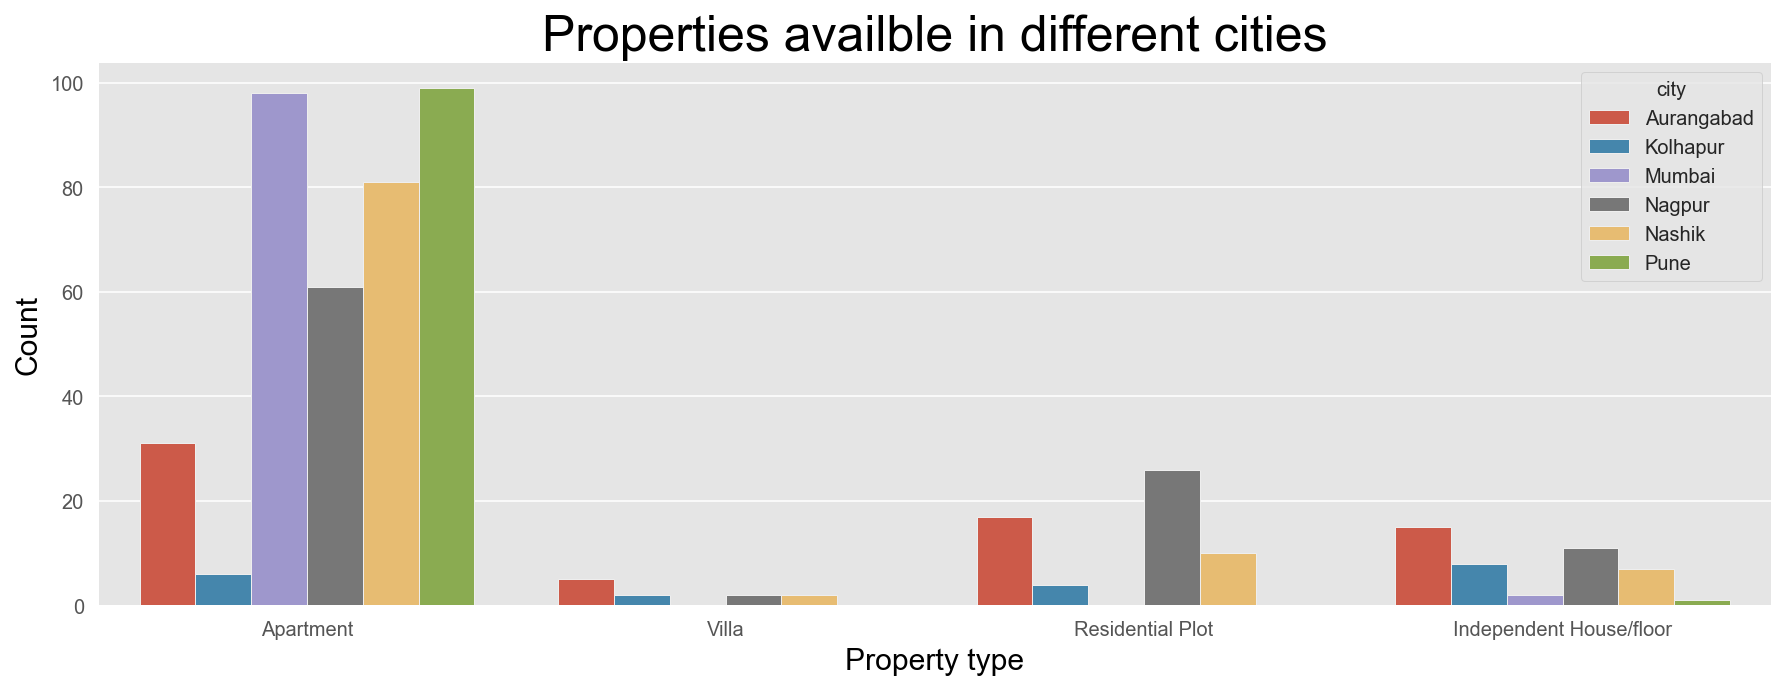

In [133]:
# Properties availble in different cities

plt.figure(figsize =(15,5))
sns.countplot(x= 'prop_name', hue = 'city', data = df_prop)
plt.title('', fontsize = 25, color = 'black')
plt.xlabel('Property type',fontsize = 15, color = 'black')
plt.ylabel('Count',fontsize = 15, color = 'black');



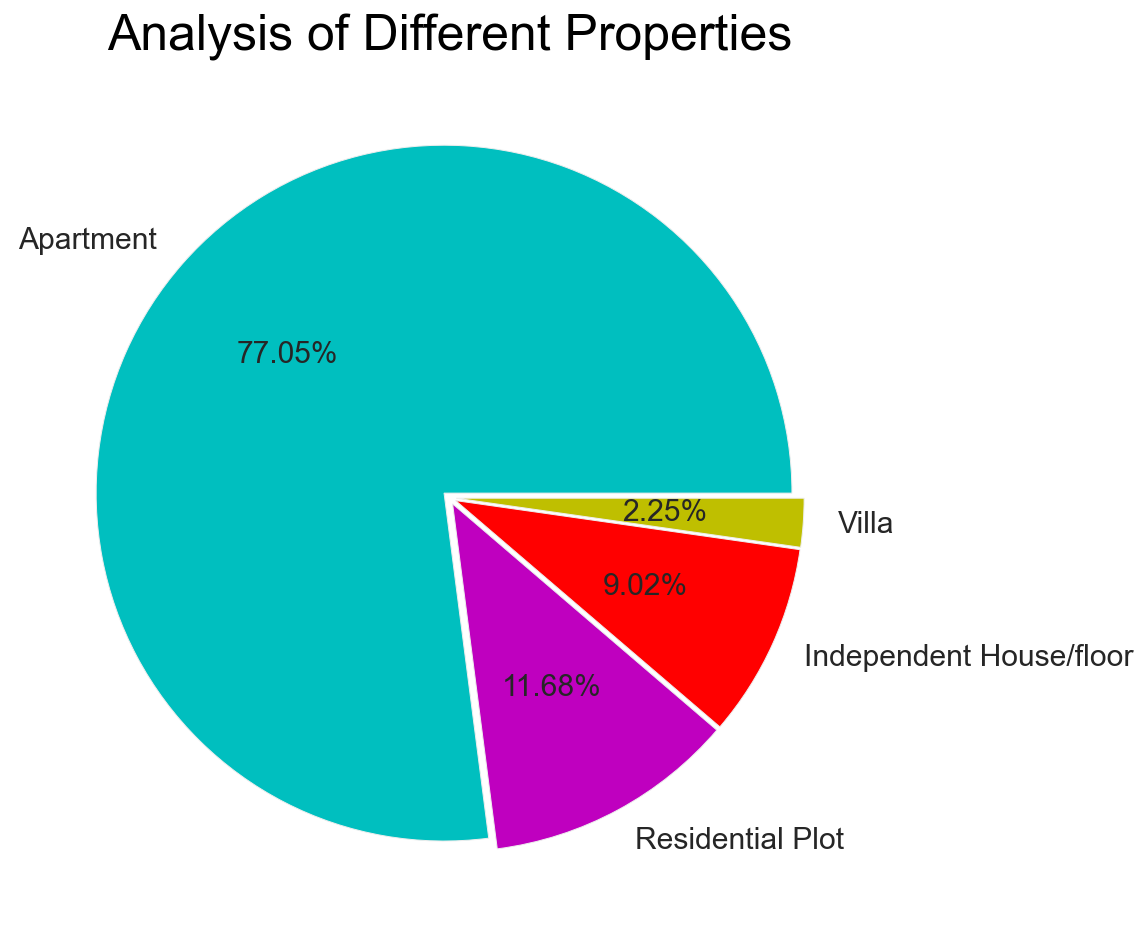

In [135]:
# Analysis of Different Properties

plt.figure(figsize = (8,8))
colors = ["c", 'm','r','y','g']
plt.pie(x = df_prop.prop_name.value_counts().values,
        labels = df_prop.prop_name.value_counts().index, autopct = '%.2f%%',explode= [0.02,0.02,0.02,0.02],
       colors = colors, textprops={"fontsize":15})
plt.title('Analysis of Different Properties', fontsize = 25, color = 'black')

plt.show();

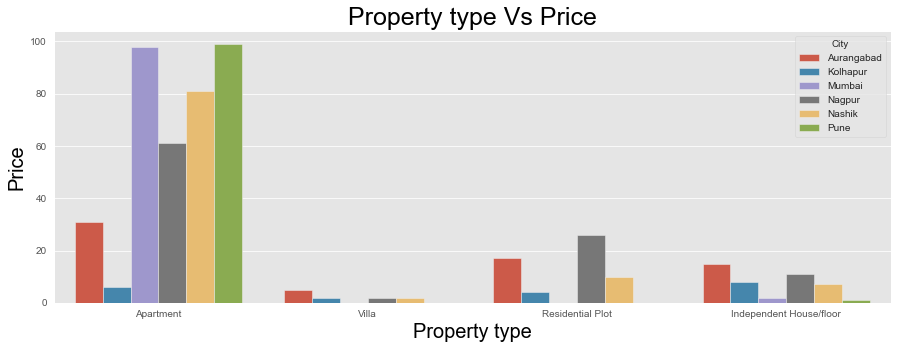

In [62]:
# Property type Vs Price

plt.figure(figsize=(15,5))
sns.barplot(x = 'prop_name' , y ='price',hue = city, data = df_prop, ci=False, estimator=np.count_nonzero);
plt.title('Property type Vs Price', fontsize = 25, color = 'black')
plt.xlabel('Property type',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');


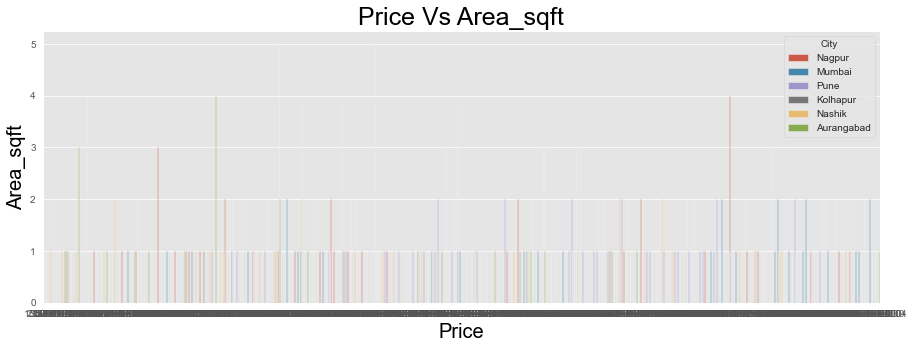

In [10]:
# Price Vs Area_sqft

plt.figure(figsize=(15,5))
sns.barplot(x = 'Total_price' , y ='Area_sqft',hue = "City", data = cities, ci=False, estimator=np.count_nonzero);
plt.title('Price Vs Area_sqft', fontsize = 25, color = 'black')
plt.xlabel('Price',fontsize = 20, color = 'black')
plt.ylabel('Area_sqft',fontsize = 20, color = 'black');


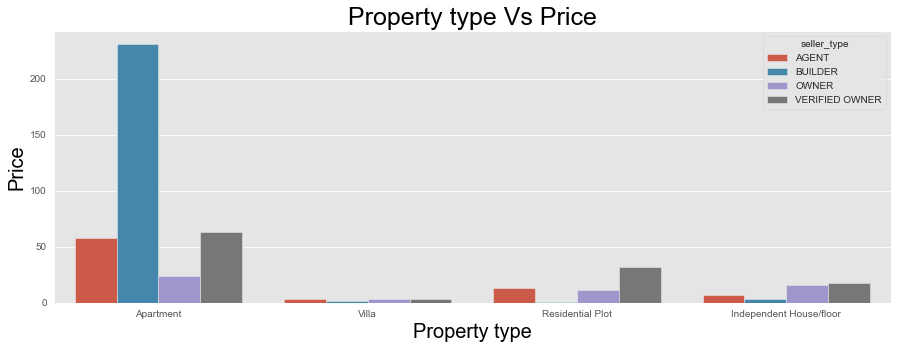

In [59]:
# Property type Vs Price

plt.figure(figsize=(15,5))
sns.countplot(x = 'prop_name',hue = 'seller_type', data = df_prop);
plt.title('Property type Vs Price', fontsize = 25, color = 'black')
plt.xlabel('Property type',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');


In [52]:
df_prop

,prop_name,city,location,price,seller_type,cons_status,area_sqft
0,Apartment,Nagpur,Besa,3531000,BUILDER,Under Construction,1022
1,Apartment,Nagpur,Parsodi,3153000,BUILDER,Under Construction,901
2,Apartment,Nagpur,Buti Bori,1449000,BUILDER,Under Construction,550
3,Apartment,Nagpur,Jamtha,2295000,BUILDER,Under Construction,980
4,Apartment,Nagpur,Besa,3531000,BUILDER,Under Construction,1071
...,...,...,...,...,...,...,...
483,Villa,Aurangabad,Shendra MIDC,1889999,OWNER,Under Construction,600
484,Residential Plot,Aurangabad,Harsul,555000,OWNER,Resale,1200
485,Residential Plot,Aurangabad,Shendra MIDC,500000,OWNER,Resale,320
486,Independent House/floor,Aurangabad,Farola,1200000,OWNER,Ready to move,600


<Figure size 1080x360 with 0 Axes>

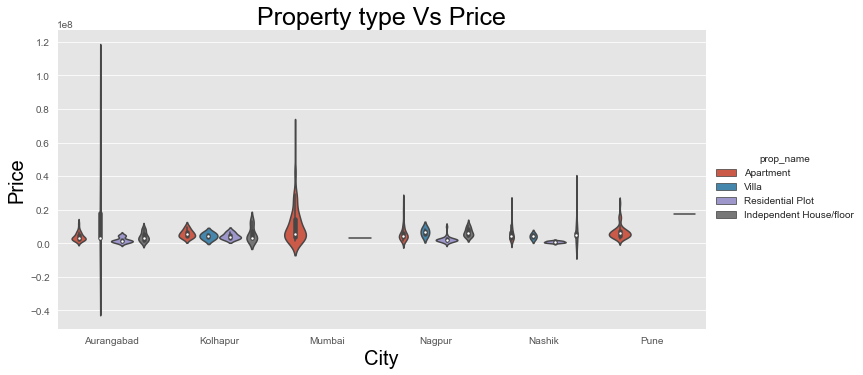

In [40]:
# Property type Vs Price

plt.figure(figsize=(15,5))
sns.catplot(data = df_prop, x = 'city', y = 'price',hue = "prop_name", kind = 'violin', aspect=2 );
plt.title('Property type Vs Price', fontsize = 25, color = 'black',)
plt.xlabel('City',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');


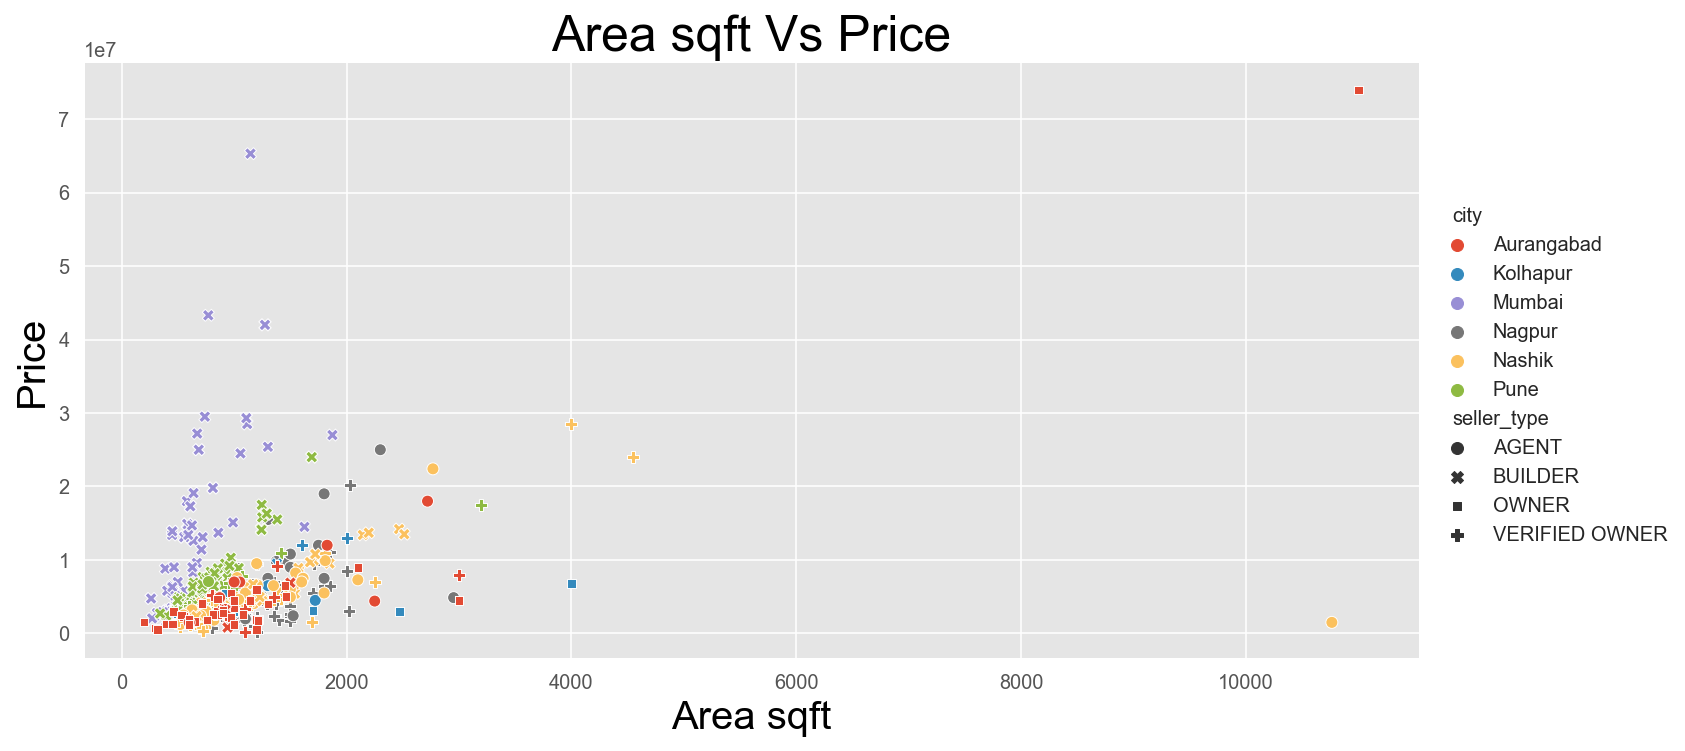

In [121]:
# Area sqft Vs Price


%config InlineBackend.figure_format='retina'

# magic command to generate HD charts

#plt.figure(size = (15,5), dpi = 200)
sns.relplot(data = df_prop , x = 'area_sqft', y= 'price'
            , hue = 'city',style = 'seller_type', aspect= 2, legend = 'auto');
plt.title('Area sqft Vs Price', fontsize = 25, color = 'black')
plt.xlabel('Area sqft',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');





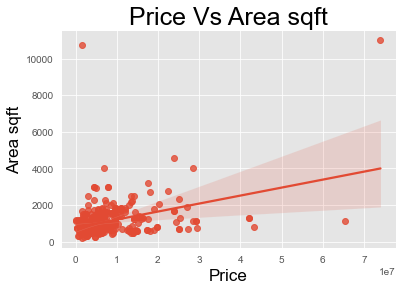

In [71]:
# Price Vs Area sqft

sns.regplot(data = cities , x='Total_price', y ='Area_sqft')
plt.title('Price Vs Area sqft', fontsize = 25, color = 'black')
plt.xlabel('Price',fontsize = 17, color = 'black')
plt.ylabel('Area sqft',fontsize = 17, color = 'black');

In [70]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Seller_Name          488 non-null    category
 1   Seller_type          488 non-null    category
 2   Property_type        488 non-null    category
 3   Location             488 non-null    category
 4   City                 488 non-null    category
 5   Total_price          488 non-null    int64   
 6   Price_per_sqft       488 non-null    int64   
 7   Area_sqft            488 non-null    int64   
 8   Construction_status  488 non-null    category
dtypes: category(6), int64(3)
memory usage: 31.9 KB


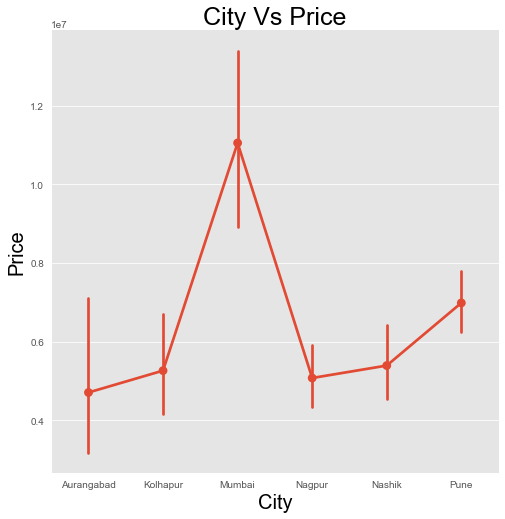

In [68]:
# City Vs Price

# plt.figure(size = (15,5), dpi = 200)
sns.catplot(data = df_prop, x = 'city', y = 'price', kind = 'point', height = 7)
plt.title('City Vs Price', fontsize = 25, color = 'black')
plt.xlabel('City',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');

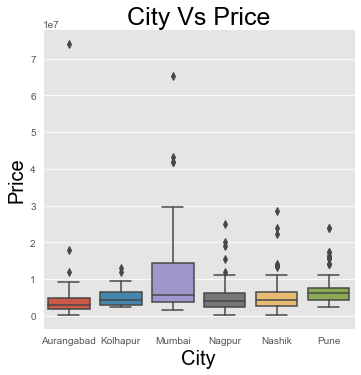

In [69]:
# City Vs Price

sns.catplot(data = df_prop, x = 'city', y = 'price', kind = 'box')
plt.title('City Vs Price', fontsize = 25, color = 'black')
plt.xlabel('City',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');